# CEU Coding 3: Python Final Project
## Greenhouse gas emission


### Gyöngyvér Kamenár and Oszkár Egervári


## Introduction
In this project we analyse and predict the CO2 emissions and consumption per countries. We try to find relationship between CO2 production, emission and other variables, such as GDP per capita, electricity production and so on.
The data we use for our analysis are CO2 and greenhouse gas emissions dataset from Kaggle, Worldbank Indicators API and we scraped the List of countries by electricity production table from Wikipedia.

First we merged the Kaggle dataset with the API data to do the time series analyses, then we merged this dataset with the scraped data from Wikipedia. That second dataset only contains one data per country for electricity production data, the latest number up to 2020. We used this data for cross-sectional analysis.


The goal of this project is to check the relationship between greenhouse gases, adn other economic and environmental variables. We use VAR model too see whether they can predict each other on time series, and also analyze the wheather there is a linear relationship on cross-sectional data between co2 and other interesting variables.

## Data Sources:

Kaggle : 
https://www.kaggle.com/danielrpdias/co2-and-greenhouse-gas-emissions


Worldbank API:
 https://datahelpdesk.worldbank.org/knowledgebase/articles/889392-about-the-indicators-api-documentation

Wikipedia:
https://en.wikipedia.org/wiki/List_of_countries_by_electricity_production
https://en.wikipedia.org/wiki/List_of_countries_by_vehicles_per_capita





In [1]:
 # Import packages
 #from google.colab import data_table
 #data_table.enable_dataframe_formatter()
 import pandas as pd
 import matplotlib as plt
 import requests
 import json
 from pandas.io.json import json_normalize
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 import bokeh as bk
 import plotly.express as px
 from pandas.api.types import is_numeric_dtype
 from statsmodels.tsa.stattools import adfuller
 

Reading the kaggle dataset from github repository and checking the variables and the data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/gyongyver-droid/python3/master/Project/owid-co2-data.csv/owid-co2-data.csv")
data.columns

Index(['iso_code', 'country', 'year', 'co2', 'consumption_co2',
       'co2_growth_prct', 'co2_growth_abs', 'trade_co2', 'co2_per_capita',
       'consumption_co2_per_capita', 'share_global_co2', 'cumulative_co2',
       'share_global_cumulative_co2', 'co2_per_gdp', 'consumption_co2_per_gdp',
       'co2_per_unit_energy', 'coal_co2', 'cement_co2', 'flaring_co2',
       'gas_co2', 'oil_co2', 'other_industry_co2', 'cement_co2_per_capita',
       'coal_co2_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita',
       'oil_co2_per_capita', 'other_co2_per_capita', 'trade_co2_share',
       'share_global_cement_co2', 'share_global_coal_co2',
       'share_global_flaring_co2', 'share_global_gas_co2',
       'share_global_oil_co2', 'share_global_other_co2',
       'cumulative_cement_co2', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_oil_co2',
       'cumulative_other_co2', 'share_global_cumulative_cement_co2',
       'share_global_cumulative_c

In [3]:
data

iso_code      country  year     co2  consumption_co2  co2_growth_prct  \
0          AFG  Afghanistan  1949   0.015              NaN              NaN   
1          AFG  Afghanistan  1950   0.084              NaN           475.00   
2          AFG  Afghanistan  1951   0.092              NaN             8.70   
3          AFG  Afghanistan  1952   0.092              NaN             0.00   
4          AFG  Afghanistan  1953   0.106              NaN            16.00   
...        ...          ...   ...     ...              ...              ...   
25199      ZWE     Zimbabwe  2016  10.738           12.153           -12.17   
25200      ZWE     Zimbabwe  2017   9.582           11.248           -10.77   
25201      ZWE     Zimbabwe  2018  11.854           13.163            23.72   
25202      ZWE     Zimbabwe  2019  10.949           12.422            -7.64   
25203      ZWE     Zimbabwe  2020  10.531              NaN            -3.82   

       co2_growth_abs  trade_co2  co2_per_capita  consumption_co2_per_capita  \
0                 NaN        NaN           0.002                         NaN   
1               0.070        NaN           0.011                         NaN   
2               0.007        NaN           0.012                         NaN   
3               0.000        NaN           0.012                         NaN   
4               0.015        NaN           0.013                         NaN   
...               ...        ...             ...                         ...   
25199          -1.488      1.415           0.765                       0.866   
25200          -1.156      1.666           0.673                       0.790   
25201           2.273      1.308           0.821                       0.912   
25202          -0.905      1.473           0.748                       0.848   
25203          -0.418        NaN           0.709                         NaN   

       ...  ghg_per_capita  methane  methane_per_capita  nitrous_oxide  \
0      ...             NaN      NaN                 NaN            NaN   
1      ...             NaN      NaN                 NaN            NaN   
2      ...             NaN      NaN                 NaN            NaN   
3      ...             NaN      NaN                 NaN            NaN   
4      ...             NaN      NaN                 NaN            NaN   
...    ...             ...      ...                 ...            ...   
25199  ...           4.703    11.92                0.85           6.55   
25200  ...             NaN      NaN                 NaN            NaN   
25201  ...             NaN      NaN                 NaN            NaN   
25202  ...             NaN      NaN                 NaN            NaN   
25203  ...             NaN      NaN                 NaN            NaN   

       nitrous_oxide_per_capita  population           gdp  \
0                           NaN   7624058.0           NaN   
1                           NaN   7752117.0  9.421400e+09   
2                           NaN   7840151.0  9.692280e+09   
3                           NaN   7935996.0  1.001732e+10   
4                           NaN   8039684.0  1.063052e+10   
...                         ...         ...           ...   
25199                     0.467  14030338.0  2.096179e+10   
25200                       NaN  14236599.0  2.194784e+10   
25201                       NaN  14438812.0  2.271535e+10   
25202                       NaN  14645473.0           NaN   
25203                       NaN  14862927.0           NaN   

       primary_energy_consumption  energy_per_capita  energy_per_gdp  
0                             NaN                NaN             NaN  
1                             NaN                NaN             NaN  
2                             NaN                NaN             NaN  
3                             NaN                NaN             NaN  
4                             NaN                NaN             NaN  
...                           ...               

We can see that there are dozens of variables in the dataset, for every country of the world and even for continents/confederations. The year goes back to the 18th century in some cases, so there is great room for filtering and cleaning.

## Data filtering

Before filtering anything, we check the number of observations for each year aka. number of countries. We can see that the  dataset reaches the max number of countries around 1990.

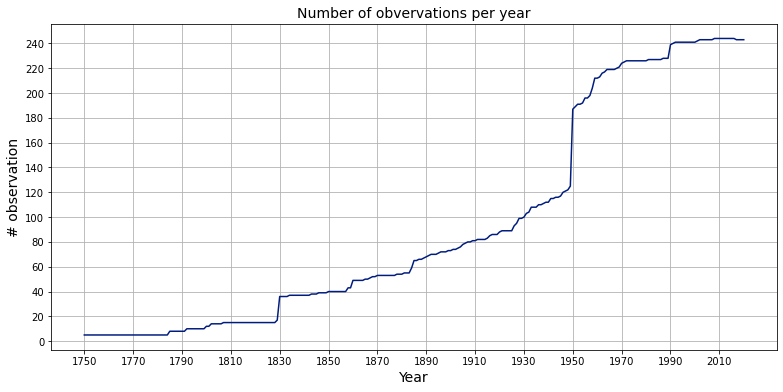

In [4]:
# Filter data
# Check observations per year
country_by_year = data.groupby('year').count()['country']
plt.figure(figsize=(13, 6))
plt.style.use('seaborn-dark-palette')
plt.plot(country_by_year)
plt.title('Number of obvervations per year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('# observation', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(1750,2030,20).tolist())
plt.yticks(np.arange(0,260,20).tolist())
plt.show()


Out of the observation for each year, we check how much is not missing / not NaN for some of the important variables. The non-missing observations are increasing with year, however, around 2018-2019 there is a decline in some variables, probably htere si not updated data yet.

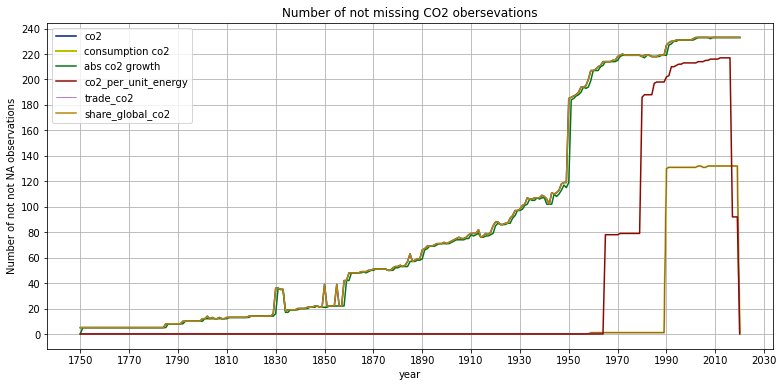

In [5]:
# Check the nas by year in every variables
data.drop('year',1).isna().groupby(data.year).sum().reset_index()
data.drop('year',1).notnull().groupby(data.year).sum().reset_index().tail(20)
# Check the not na-s in each variable
data.drop('year',1).notnull().groupby(data.year).sum().reset_index()
plt.figure(figsize=(13, 6))
plt.style.use('seaborn-dark-palette')
plt.plot(data.drop('year',1).notnull().groupby(data.year).sum()['co2'], label='co2', linewidth=1.5)
plt.plot(data.drop('year',1).notnull().groupby(data.year).sum()['consumption_co2'],'y',label='consumption co2', linewidth=2)
plt.plot(data.drop('year',1).notnull().groupby(data.year).sum()['co2_growth_abs'],label='abs co2 growth')
plt.plot(data.drop('year',1).notnull().groupby(data.year).sum()['co2_per_unit_energy'],label='co2_per_unit_energy')
plt.plot(data.drop('year',1).notnull().groupby(data.year).sum()['trade_co2'],label='trade_co2', linewidth=0.5)
plt.plot(data.drop('year',1).notnull().groupby(data.year).sum()['share_global_co2'],label='share_global_co2')
plt.title("Number of not missing CO2 obersevations")
plt.xlabel("year")
plt.ylabel("Number of not not NA observations")
plt.grid(True)
plt.xticks(np.arange(1750,2040,20).tolist())
plt.yticks(np.arange(0,260,20).tolist())
plt.legend()
plt.show();

Based on the above charts, we conclude that it's enough to use the data from 1990 to 2019.

In [6]:
# filter data from 1990 to 2019
data = data[data['year']>=1990]
data = data[data['year']<2020]

### Collect data from API

To  enrich our dataset with valuable features, we can use the Worldbank API. We wrote a function, which gets the values of a variable from a given time interval of given countries.

In [7]:
# Function
def get_worldbank_api(variable, year_from='2010',year_to='2020',country='all'):
    url ="http://api.worldbank.org/v2/country/{}/indicator/{}?date={}:{}&format=json&per_page=30000".format(country,variable,year_from,year_to)
    resp = requests.get(url)
    df_json = json.loads(resp.text)[1]
    variable_name = df_json[1]['indicator']['value']
    df = pd.json_normalize(df_json)
    df.rename(columns = {'value':variable_name}, inplace =True)
    return df.iloc[:,0:3]

We can test is to get teh "Access to electricity % of population" of all countries (all is the default) in 2020. See the table below:

In [8]:
get_worldbank_api("EG.ELC.ACCS.ZS",'2020','2020')

countryiso3code  date Access to electricity (% of population)
0               AFE  2020                                    None
1               AFW  2020                                    None
2               ARB  2020                                    None
3               CSS  2020                                    None
4               CEB  2020                                    None
..              ...   ...                                     ...
261             VIR  2020                                    None
262             PSE  2020                                    None
263             YEM  2020                                    None
264             ZMB  2020                                    None
265             ZWE  2020                                    None

[266 rows x 3 columns]

We searched the code of some possibly relevant variables from the worldbank and collected them into a list. The we can apply the previously defined function on all of them, for teh selected time interval and for all countries. Finally, we merge these variables into 1 dataframe.

In [9]:
# Merging variables from worldbank API them
variables = ['EG.ELC.ACCS.ZS','EG.FEC.RNEW.ZS','EG.ELC.RNWX.ZS','SP.POP.TOTL','NV.IND.MANF.ZS','TM.VAL.MANF.ZS.UN','SL.TLF.CACT.NE.ZS','NY.GDP.PCAP.KD.ZG','NY.GDP.PCAP.KD']#,'SH.XPD.GHED.GD.ZS']
df_worldbank = pd.DataFrame({'countryiso3code':[],'date':[]})
for variable in variables:
    df_worldbank = df_worldbank.merge(get_worldbank_api(variable,"1990","2019"),how='outer', on=['countryiso3code','date'])

# Result
df_worldbank.head()

countryiso3code  date  Access to electricity (% of population)  \
0             AFE  2019                                43.640661   
1             AFE  2018                                42.168241   
2             AFE  2017                                39.754201   
3             AFE  2016                                38.380433   
4             AFE  2015                                33.312163   

   Renewable energy consumption (% of total final energy consumption)  \
0                                                NaN                    
1                                                NaN                    
2                                                NaN                    
3                                                NaN                    
4                                          61.097264                    

   Electricity production from renewable sources, excluding hydroelectric (% of total)  \
0                                                NaN                                     
1                                                NaN                                     
2                                                NaN                                     
3                                                NaN                                     
4                                           2.817531                                     

   Population, total  Manufacturing, value added (% of GDP)  \
0        660046272.0                              10.640794   
1        643090131.0                              10.636882   
2        626392880.0                              10.585756   
3        609978946.0                              10.522995   
4        593871847.0                              10.213868   

   Manufactures imports (% of merchandise imports)  \
0                                        63.883929   
1                                        63.469185   
2                                        64.115320   
3                                        65.504469   
4                                        65.288688   

   Labor force participation rate, total (% of total population ages 15+) (national estimate)  \
0                                                NaN                                            
1                                                NaN                                            
2                                                NaN                                            
3                                                NaN                                            
4                                                NaN                                            

   GDP per capita growth (annual %)  GDP per capita (constant 2015 US$)  
0                         -0.544414                         1525.165516  
1                         -0.185406                         1533.514183  
2                         -0.144710                         1536.362686  
3                         -0.674533                         1538.589175  
4                          0.187860                         1549.037940

In [10]:
df_worldbank.dtypes

countryiso3code                                                                                object
date                                                                                           object
Access to electricity (% of population)                                                       float64
Renewable energy consumption (% of total final energy consumption)                            float64
Electricity production from renewable sources, excluding hydroelectric (% of total)           float64
Population, total                                                                             float64
Manufacturing, value added (% of GDP)                                                         float64
Manufactures imports (% of merchandise imports)                                               float64
Labor force participation rate, total (% of total population ages 15+) (national estimate)    float64
GDP per capita growth (annual %)                                                  

Convering the to numeric

In [11]:
# Convert date to numeric
df_worldbank['date'] = pd.to_numeric(df_worldbank['date'])

## Data cleaning and mungling
- merge and clean the datasets
- filter for relevant parts

Firsly, we merge the filtered dataset from kaggle to the data collected from the worldbank API

In [12]:
# merge kaggle data with worldbank API data
data = data.merge(df_worldbank,left_on=['iso_code','year'], right_on=['countryiso3code','date'],how='left')

We still have lots of observation and variables.

In [13]:
data.shape
data.shape

(7273, 69)

### Check which columns/variables should we use
We count the number of missing values for each variable, to select between them. Obviously, we want to use variables that have values for more countries adn years.

In [14]:
# Number of NAs per column/variable
variables_with_missing = data.isna().sum(axis=0).reset_index().rename(columns={'level_0':'id','index':'variable',0:'NA'})
variables_with_missing[variables_with_missing['NA']<3000]
variables_with_missing

variable    NA
0                                            iso_code   733
1                                             country     0
2                                                year     0
3                                                 co2   314
4                                     consumption_co2  3329
..                                                ...   ...
64              Manufacturing, value added (% of GDP)  2284
65    Manufactures imports (% of merchandise imports)  2907
66  Labor force participation rate, total (% of to...  4144
67                   GDP per capita growth (annual %)  1666
68                 GDP per capita (constant 2015 US$)  1693

[69 rows x 2 columns]

We filter out countries with missing 'co2' value because this variables is out main interest.

In [15]:
# Filter countries with on missing 'co2'
country_missing = data.drop('country',1).isna().groupby(data.country).sum()['co2']
countries_to_drop = country_missing[country_missing>0].index.tolist()
countries_to_drop
data = data.query('country != @countries_to_drop')
data.shape

(6857, 69)

We also filter out countries with missing co2 consumption

In [16]:
# Filter countries with on missing 'consumption_co2'
country_missing =data.drop('country',1).isna().groupby(data.country).sum()['consumption_co2']
countries_to_drop = country_missing[country_missing>0].index.tolist()
countries_to_drop
data = data.query('country != @countries_to_drop')
print(data.shape)


(3870, 69)


We check the rows with missing co2 per gdp but we do not omit all counties just the missing rows with an anti join function

In [17]:
# Check missing  co2_per_gdp
data[data['Renewable energy consumption (% of total final energy consumption)'].isna()]
# Missing in 2019 for all countries
data[data['co2_per_gdp'].isna()]

# Anti join function
def anti_join(x, y, on):
    """Return rows in x which are not present in y"""
    ans = pd.merge(left=x, right=y, how='left', indicator=True, on=on)
    ans = ans.loc[ans._merge == 'left_only', :].drop(columns='_merge')
    return ans

def anti_join_all_cols(x, y):
    """Return rows in x which are not present in y"""
    assert set(x.columns.values) == set(y.columns.values)
    return anti_join(x, y, x.columns.tolist())

data = anti_join_all_cols(data,data[data['co2_per_gdp'].isna()])

In [18]:
# Check missing in 'energy_per_capita'
data[data['energy_per_capita'].isna()]

iso_code   country  year     co2  consumption_co2  co2_growth_prct  \
57        ALB   Albania  2017   5.302            6.159            18.03   
58        ALB   Albania  2018   4.734            5.806           -10.71   
90        ARM   Armenia  1990   8.962            6.039            -5.89   
91        ARM   Armenia  1991   7.288            4.569           -18.68   
117       ARM   Armenia  2017   5.537            5.710             6.41   
...       ...       ...   ...     ...              ...              ...   
3718      URY   Uruguay  2018   6.571           11.772             6.63   
3837      ZMB    Zambia  2017   6.517            9.691            15.16   
3838      ZMB    Zambia  2018   7.313           10.109            12.21   
3867      ZWE  Zimbabwe  2017   9.582           11.248           -10.77   
3868      ZWE  Zimbabwe  2018  11.854           13.163            23.72   

      co2_growth_abs  trade_co2  co2_per_capita  consumption_co2_per_capita  \
57             0.810      0.857           1.838                       2.135   
58            -0.568      1.072           1.642                       2.014   
90            -0.561     -2.923           2.533                       1.707   
91            -1.674     -2.719           2.079                       1.304   
117            0.334      0.173           1.880                       1.939   
...              ...        ...             ...                         ...   
3718           0.408      5.201           1.905                       3.413   
3837           0.858      3.173           0.387                       0.575   
3838           0.796      2.796           0.422                       0.583   
3867          -1.156      1.666           0.673                       0.790   
3868           2.273      1.308           0.821                       0.912   

      ...    date  Access to electricity (% of population)  \
57    ...  2017.0                                99.890000   
58    ...  2018.0                               100.000000   
90    ...  1990.0                                      NaN   
91    ...  1991.0                                      NaN   
117   ...  2017.0                                99.700000   
...   ...     ...                                      ...   
3718  ...  2018.0                                99.800000   
3837  ...  2017.0                                40.300000   
3838  ...  2018.0                                39.822304   
3867  ...  2017.0                                40.144283   
3868  ...  2018.0                                40.616360   

      Renewable energy consumption (% of total final energy consumption)  \
57                                            37.219799                    
58                                            38.266399                    
90                                             2.118944                    
91                                             2.309436                    
117                                           12.562600                    
...                                                 ...                    
3718                                          60.729099                    
3837                                          84.687798                    
3838                                          85.104599                    
3867                                          83.492996                    
3868                                          81.363602                    

      Electricity production from renewable sources, excluding hydroelectric (% of total)  \
57                                                  NaN                                     
58                                                  NaN                                     
90                                                  0.0                                     
91                                                  0.0                                     
117                             

In [19]:
data[data['Renewable energy consumption (% of total final energy consumption)'].isna()]

iso_code country  year        co2  consumption_co2  co2_growth_prct  \
0          NaN  Africa  1990    659.295          456.070            -5.71   
1          NaN  Africa  1991    689.026          475.983             4.51   
2          NaN  Africa  1992    668.677          485.220            -2.95   
3          NaN  Africa  1993    708.858          500.671             6.01   
4          NaN  Africa  1994    719.623          504.509             1.52   
...        ...     ...   ...        ...              ...              ...   
3790  OWID_WRL   World  2000  25234.207        25234.207             2.92   
3800  OWID_WRL   World  2010  33343.300        33343.300             5.49   
3806  OWID_WRL   World  2016  35452.459        35452.459            -0.12   
3807  OWID_WRL   World  2017  35925.738        35925.738             1.33   
3808  OWID_WRL   World  2018  36646.140        36646.140             2.01   

      co2_growth_abs  trade_co2  co2_per_capita  consumption_co2_per_capita  \
0            -39.926   -203.224           1.052                       0.728   
1             29.731   -213.043           1.068                       0.738   
2            -20.348   -183.457           1.010                       0.733   
3             40.181   -208.188           1.043                       0.737   
4             10.764   -215.113           1.029                       0.722   
...              ...        ...             ...                         ...   
3790         715.245      0.000           4.107                       4.107   
3800        1736.258     -0.000           4.793                       4.793   
3806         -43.947     -0.000           4.750                       4.750   
3807         473.278      0.000           4.760                       4.760   
3808         720.402     -0.000           4.802                       4.802   

      ...  date  Access to electricity (% of population)  \
0     ...   NaN                                      NaN   
1     ...   NaN                                      NaN   
2     ...   NaN                                      NaN   
3     ...   NaN                                      NaN   
4     ...   NaN                                      NaN   
...   ...   ...                                      ...   
3790  ...   NaN                                      NaN   
3800  ...   NaN                                      NaN   
3806  ...   NaN                                      NaN   
3807  ...   NaN                                      NaN   
3808  ...   NaN                                      NaN   

      Renewable energy consumption (% of total final energy consumption)  \
0                                                   NaN                    
1                                                   NaN                    
2                                                   NaN                    
3                                                   NaN                    
4                                                   NaN                    
...                                                 ...                    
3790                                                NaN                    
3800                                                NaN                    
3806                                                NaN                    
3807                                                NaN                    
3808                                                NaN                    

      Electricity production from renewable sources, excluding hydroelectric (% of total)  \
0                                                   NaN                                     
1                                                   NaN                                     
2                                                   NaN                                     
3                                                   NaN                                     
4                                

Dropping the countries with missing renewable energy consumption

In [20]:
country_missing =data.drop('country',1).isna().groupby(data.country).sum()['Renewable energy consumption (% of total final energy consumption)']
countries_to_drop = country_missing[country_missing>0].index.tolist()
countries_to_drop
data = data.query('country != @countries_to_drop')
print(data.shape)

(3275, 69)


Filter out observations with missing energy per capita

In [21]:
# Filter countries with on missing 'energy per capita'
country_missing =data.drop('country',1).isna().groupby(data.country).sum()['energy_per_capita']
countries_to_drop = country_missing[country_missing>0].index.tolist()
print(countries_to_drop)
#data = data.query('country != @countries_to_drop')

data = anti_join_all_cols(data,data[data['energy_per_capita'].isna()])
data.shape

['Albania', 'Armenia', 'Bahrain', 'Benin', 'Bolivia', 'Botswana', 'Burkina Faso', 'Cameroon', 'Costa Rica', "Cote d'Ivoire", 'Dominican Republic', 'El Salvador', 'Ethiopia', 'Georgia', 'Ghana', 'Guatemala', 'Guinea', 'Honduras', 'Jamaica', 'Jordan', 'Kenya', 'Kyrgyzstan', 'Laos', 'Madagascar', 'Malawi', 'Malta', 'Mauritius', 'Mongolia', 'Mozambique', 'Nepal', 'Nicaragua', 'Nigeria', 'Paraguay', 'Rwanda', 'Senegal', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Uruguay', 'Zambia', 'Zimbabwe']


(3158, 69)

Checking energy per gdp we can see that it's missing in 2017 and 2018 for majority of teh countries, do not drop them for know, because it's just the end of the time range

In [22]:
# Checking missing energy per gdp
data[data['energy_per_gdp'].isna()]
# Missing in 2017 and 2018 for majority of teh countries
# do not drop them for know, because it's just the end of the time range

iso_code        country  year       co2  consumption_co2  \
56        ARG      Argentina  2017   187.805          195.394   
57        ARG      Argentina  2018   181.100          184.790   
114       AUS      Australia  2017   414.751          388.002   
115       AUS      Australia  2018   416.001          378.525   
143       AUT        Austria  2017    69.599           94.992   
...       ...            ...   ...       ...              ...   
3129      USA  United States  2018  5375.491         5726.611   
3186      VEN      Venezuela  2017   161.536          175.702   
3187      VEN      Venezuela  2018   120.177          142.034   
3215      VNM        Vietnam  2017   195.249          198.223   
3216      VNM        Vietnam  2018   223.718          214.547   

      co2_growth_prct  co2_growth_abs  trade_co2  co2_per_capita  \
56              -1.66          -3.172      7.590           4.274   
57              -3.57          -6.705      3.691           4.082   
114             -0.29          -1.194    -26.749          16.870   
115              0.30           1.250    -37.476          16.708   
143              3.55           2.383     25.393           7.891   
...               ...             ...        ...             ...   
3129             3.22         167.739    351.120          16.434   
3186            -4.69          -7.941     14.166           5.494   
3187           -25.60         -41.359     21.858           4.160   
3215             1.29           2.484      2.973           2.064   
3216            14.58          28.468     -9.171           2.342   

      consumption_co2_per_capita  ...    date  \
56                         4.447  ...  2017.0   
57                         4.166  ...  2018.0   
114                       15.782  ...  2017.0   
115                       15.203  ...  2018.0   
143                       10.770  ...  2017.0   
...                          ...  ...     ...   
3129                      17.507  ...  2018.0   
3186                       5.976  ...  2017.0   
3187                       4.917  ...  2018.0   
3215                       2.095  ...  2017.0   
3216                       2.246  ...  2018.0   

      Access to electricity (% of population)  \
56                                 100.000000   
57                                 100.000000   
114                                100.000000   
115                                100.000000   
143                                100.000000   
...                                       ...   
3129                               100.000000   
3186                                99.200000   
3187                                99.908302   
3215                               100.000000   
3216                               100.000000   

      Renewable energy consumption (% of total final energy consumption)  \
56                                            10.368500                    
57                                            10.520800                    
114                                            9.686100                    
115                                            9.645000                    
143                                           33.959099                    
...                                                 ...                    
3129                                          10.107200                    
3186                                          14.310400                    
3187                                          14.564700                    
3215                                          31.975700                    
3216                                          23.491800                    

      Electricity production from renewable sources, excluding hydroelectric (% of total)  \
56                                                  NaN                                     
57                                                  NaN                                     
114                                  

Check how much and which countries left and shape of teh datatable

In [23]:
# Number of countries left
print(len(data['country'].unique()))
data['country'].unique()

112


array(['Albania', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium',
       'Benin', 'Bolivia', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Ethiopia', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Honduras', 'Hong Kong',
       'Hungary', 'India', 'Indonesia', 'Iran', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lithuania',
       'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Morocco', 'Mozambique',
       'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria',
       'Oman', 'Pakistan', 'Paraguay', 'Peru', 'Phil

In [24]:

data.shape

(3158, 69)

In [25]:
# Number of countries left
print(len(data['country'].unique()))

112


### Remove columns/variables with too much missing values on the selected range for the selected countires

Again, we count how much missing value each variable has, and now we drop the variables/columns that have left 150+ NaNs. By checking the shape, we can see that the columns deceased to 38, so the datatable is more transparent now.

In [26]:
# Select variables with too much missing values
variables_with_missing = data.isna().sum(axis=0).reset_index().rename(columns={'level_0':'id','index':'variable',0:'NA'})
variables_with_missing = variables_with_missing[variables_with_missing['NA']>150]
variables_with_missing.variable.to_list()
data.drop(columns=variables_with_missing.variable.to_list(),inplace=True,axis=1)
data.shape

(3158, 38)

We can further filter and clean the data after we see what we can use out of it in the explanatory data analysis adn modelling part.

### Collect data from webscraping

We have also found some interesting data on wikipedia ,which we can scrape and see whether it has any connection with greenhouse gases.

In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [28]:
res = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_electricity_production')
table_class = "wikitable sortable static-row-numbers plainrowheaders srn-white-background jquery-tablesorter"

In [29]:
soup = BeautifulSoup(res.text, 'html.parser')
e_table=soup.find('table',{'class':"wikitable"})

In [30]:
df=pd.read_html(str(e_table))
df=pd.DataFrame(df[0])

In [31]:
df = df.rename(columns={"Electricity production.mw-parser-output .nobold{font-weight:normal}(GWh)": "Electricity_production_GWh"})

In [32]:
df

Country  Electricity_production_GWh      Year
0               World                    26823200   [1]2020
1               China                     7779100   [1]2020
2       United States                     4286600   [1]2020
3               India                     1560900   [1]2020
4              Russia                     1085400   [1]2020
..                ...                         ...       ...
205          Kiribati                          29  [12]2016
206        Montserrat                          24  [12]2016
207  Falkland Islands                          19  [12]2016
208      Saint Helena                           7  [12]2016
209              Niue                           3  [12]2016

[210 rows x 3 columns]

In [33]:
#Cleaning year column
df['Year'] = df['Year'].apply(lambda x: re.sub("\[.*?\]","", x))
df['Year'].unique()


array(['2020', '2019', '2011', '2017', '2016', '2010', '<2020', '2001',
       '2015', '2014', '2002', '2005'], dtype=object)

In [34]:
df['Year'] = df['Year'].apply(lambda x: re.sub("<","", x))
df['Year'] = pd.to_numeric(df['Year'])
df

Country  Electricity_production_GWh  Year
0               World                    26823200  2020
1               China                     7779100  2020
2       United States                     4286600  2020
3               India                     1560900  2020
4              Russia                     1085400  2020
..                ...                         ...   ...
205          Kiribati                          29  2016
206        Montserrat                          24  2016
207  Falkland Islands                          19  2016
208      Saint Helena                           7  2016
209              Niue                           3  2016

[210 rows x 3 columns]

In [35]:
#changing 2020 or 2019 to match current data
df.loc[df["Year"] >= data['year'].max(), "Year"] = data['year'].max()

In [36]:
df

Country  Electricity_production_GWh  Year
0               World                    26823200  2018
1               China                     7779100  2018
2       United States                     4286600  2018
3               India                     1560900  2018
4              Russia                     1085400  2018
..                ...                         ...   ...
205          Kiribati                          29  2016
206        Montserrat                          24  2016
207  Falkland Islands                          19  2016
208      Saint Helena                           7  2016
209              Niue                           3  2016

[210 rows x 3 columns]

Merging the tables

In [37]:
data1 = data.merge(df,left_on=['country','year'], right_on=['Country','Year'],how='left')

In [38]:
data1 = data1[data1['Year'].notnull()]
data1

iso_code        country  year       co2  consumption_co2  \
55        ARG      Argentina  2018   181.100          184.790   
109       AUS      Australia  2018   416.001          378.525   
138       AUT        Austria  2018    66.565           93.083   
167       AZE     Azerbaijan  2018    36.847           39.159   
223       BGD     Bangladesh  2018    82.600          105.493   
...       ...            ...   ...       ...              ...   
2899      UGA         Uganda  2011     3.824            6.253   
2933      UKR        Ukraine  2018   232.033          220.109   
3018      USA  United States  2018  5375.491         5726.611   
3074      VEN      Venezuela  2018   120.177          142.034   
3103      VNM        Vietnam  2018   223.718          214.547   

      co2_growth_prct  co2_growth_abs  trade_co2  co2_per_capita  \
55              -3.57          -6.705      3.691           4.082   
109              0.30           1.250    -37.476          16.708   
138             -4.36          -3.033     26.518           7.486   
167              0.32           0.117      2.312           3.703   
223              2.05           1.656     22.893           0.512   
...               ...             ...        ...             ...   
2899             7.13           0.254      2.429           0.114   
2933             4.01           8.948    -11.924           5.244   
3018             3.22         167.739    351.120          16.434   
3074           -25.60         -41.359     21.858           4.160   
3103            14.58          28.468     -9.171           2.342   

      consumption_co2_per_capita  ...  energy_per_gdp  countryiso3code  \
55                         4.166  ...             NaN              ARG   
109                       15.203  ...             NaN              AUS   
138                       10.469  ...             NaN              AUT   
167                        3.936  ...             NaN              AZE   
223                        0.654  ...             NaN              BGD   
...                          ...  ...             ...              ...   
2899                       0.187  ...           0.319              UGA   
2933                       4.975  ...             NaN              UKR   
3018                      17.507  ...             NaN              USA   
3074                       4.917  ...             NaN              VEN   
3103                       2.246  ...             NaN              VNM   

        date  \
55    2018.0   
109   2018.0   
138   2018.0   
167   2018.0   
223   2018.0   
...      ...   
2899  2011.0   
2933  2018.0   
3018  2018.0   
3074  2018.0   
3103  2018.0   

      Renewable energy consumption (% of total final energy consumption)  \
55                                            10.520800                    
109                                            9.645000                    
138                                           33.845600                    
167                                            1.971300                    
223                                           30.706200                    
...                                                 ...                    
2899                                          92.791496                    
2933                                           6.907300                    
3018                                          10.107200                    
3074                                          14.564700                    
3103                                          23.491800                    

      Population, total  GDP per capita growth (annual %)  \
55           44494502.0                         -3.601610   
109          24982688.0                          1.302841   
138           8840521.0                          2.003553   
167           9939771.0                          0.624486   
223         161376713.0                          6.733299   
...                 ...                       

In [39]:
#calculating electricity production per capita
data1['Electricity_production_MWh_percapita'] = (data1['Electricity_production_GWh']/data1['population'])*1000

## Exploratory data analysis

Checking the distribution of variables to better understand the data

The plot_histogram function plots the histogram of a given variable and labels the maximum

In [40]:
def plot_histogram(variable='co2',bins=100):
  plt.figure(figsize=(16, 6))
  plt.style.use('seaborn-dark-palette')
  plt.hist(data[variable], bins=bins)
  plt.grid(True)
  title = 'Distribution of '+variable+' of countries from 1990 to 2019'
  plt.title(title, fontsize=14)
  max_cntry = data[ data[variable]==data[variable].max()]['country'].values[0]
  max_value =str(round(data[variable].max(),0))
  max_label = 'Max country: '+max_cntry+'\nValue:'+max_value
  plt.annotate(max_label,xy=(1, 1),  xycoords='data', xytext=(0.85, 0.1), textcoords='axes fraction')
  plt.show()

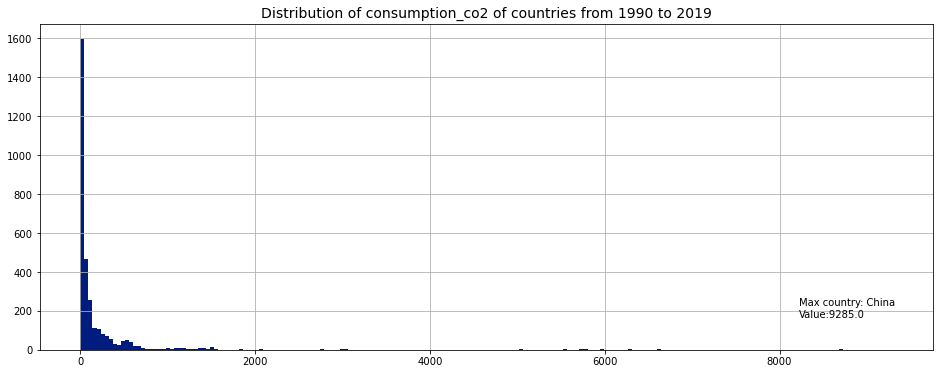

In [41]:
plot_histogram('consumption_co2',200)

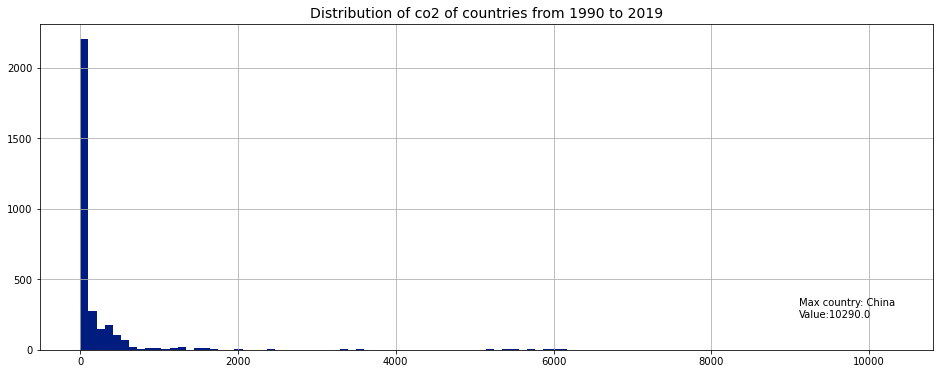

In [42]:
plot_histogram('co2',100)

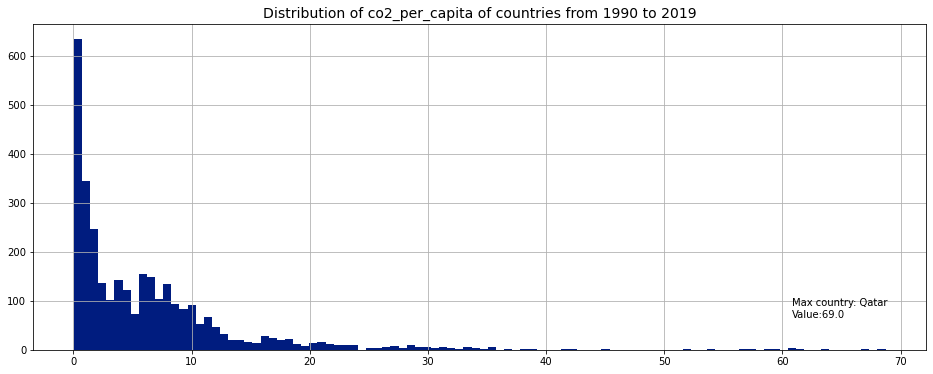

In [43]:
plot_histogram('co2_per_capita')

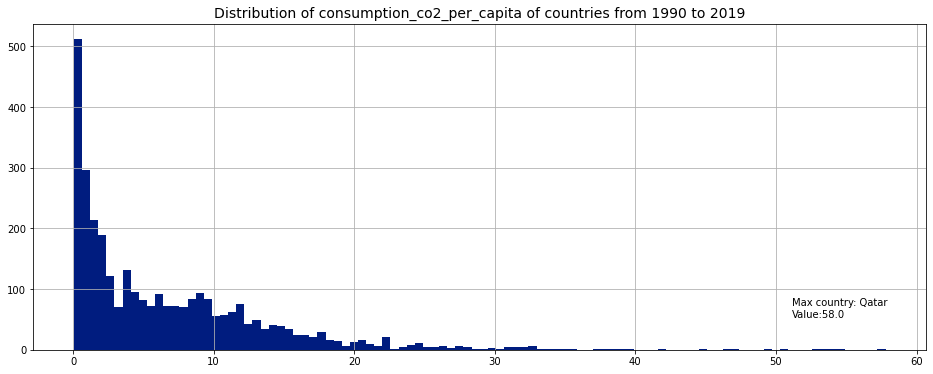

In [44]:
plot_histogram('consumption_co2_per_capita')

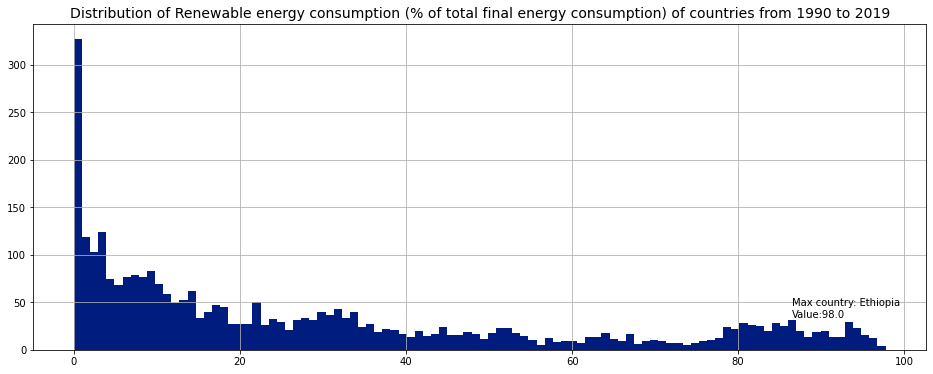

In [45]:
plot_histogram('Renewable energy consumption (% of total final energy consumption)')

Check distribution on boxplot for given year.

In [46]:
def plot_box(variable='co2',year=2018):
  plt.figure(figsize=(16, 6))
  plt.style.use('seaborn-dark-palette')
  plt.grid(True)
  title = 'Distribution of '+variable+' of countries in '+str(year)
  plt.title(title, fontsize=14)
  plt.boxplot(data[data['year']==year][variable], patch_artist=True)
  plt.show()

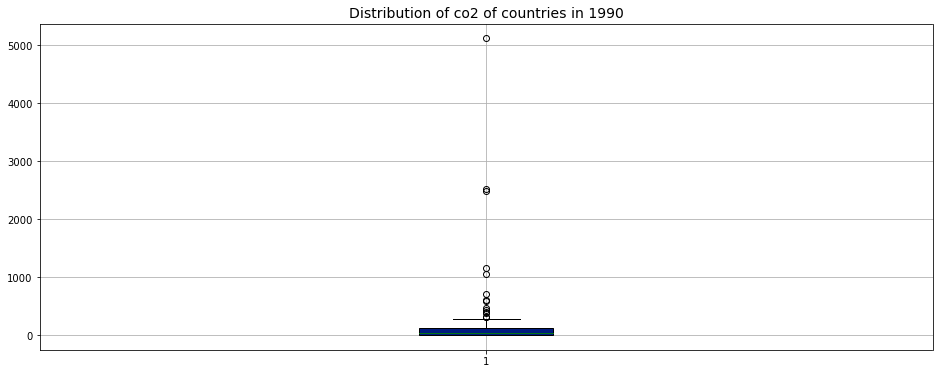

In [47]:
plot_box('co2',1990)

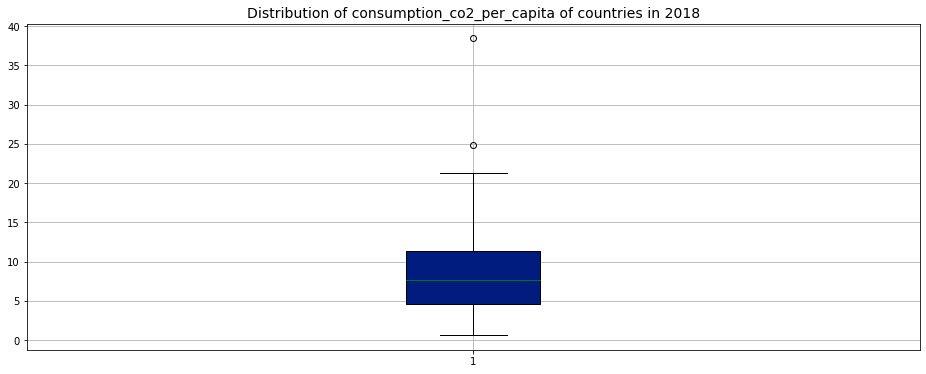

In [48]:
plot_box('consumption_co2_per_capita',year=2018)

Ob the boxplot we can see sevaral extreme values / outliers, however, we should not omit them in any case. It's naturaly the small / big countries have extreme features compared to the others, and in the analysis we have to take it into account.

In [49]:
data.columns

Index(['iso_code', 'country', 'year', 'co2', 'consumption_co2',
       'co2_growth_prct', 'co2_growth_abs', 'trade_co2', 'co2_per_capita',
       'consumption_co2_per_capita', 'share_global_co2', 'cumulative_co2',
       'share_global_cumulative_co2', 'co2_per_gdp', 'consumption_co2_per_gdp',
       'co2_per_unit_energy', 'cement_co2', 'oil_co2', 'cement_co2_per_capita',
       'oil_co2_per_capita', 'trade_co2_share', 'share_global_cement_co2',
       'share_global_oil_co2', 'cumulative_cement_co2', 'cumulative_oil_co2',
       'share_global_cumulative_cement_co2', 'share_global_cumulative_oil_co2',
       'population', 'gdp', 'primary_energy_consumption', 'energy_per_capita',
       'energy_per_gdp', 'countryiso3code', 'date',
       'Renewable energy consumption (% of total final energy consumption)',
       'Population, total', 'GDP per capita growth (annual %)',
       'GDP per capita (constant 2015 US$)'],
      dtype='object')

 Correletation matrix of variables to check the pairwise correlation on heatmap.

<AxesSubplot:>

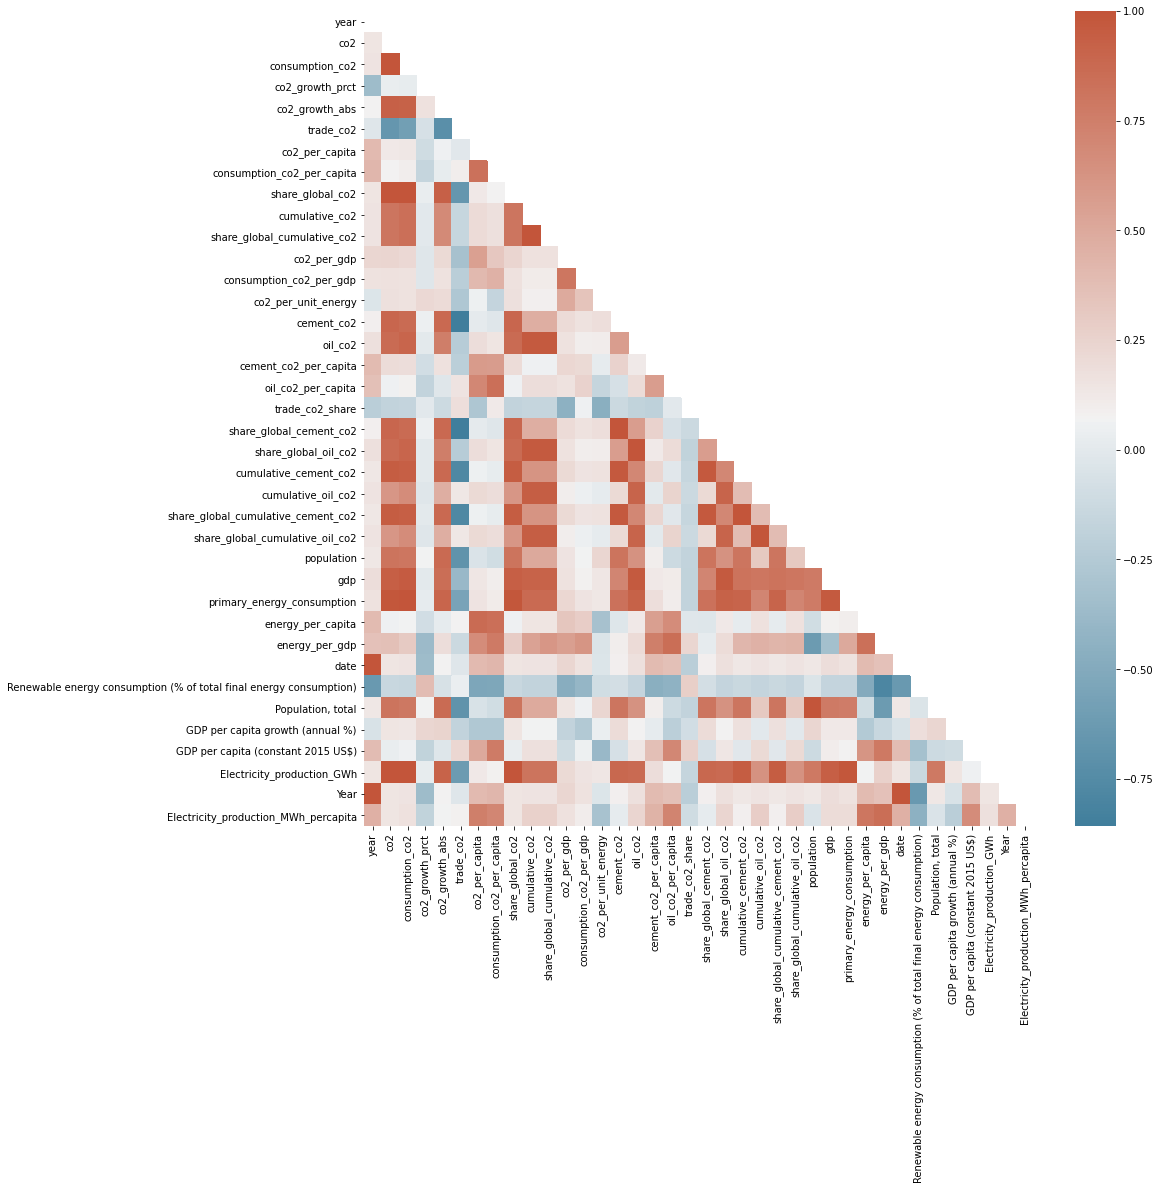

In [50]:
corr = data1.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(15, 15))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=False, mask = mask, cmap=cmap)

<AxesSubplot:>

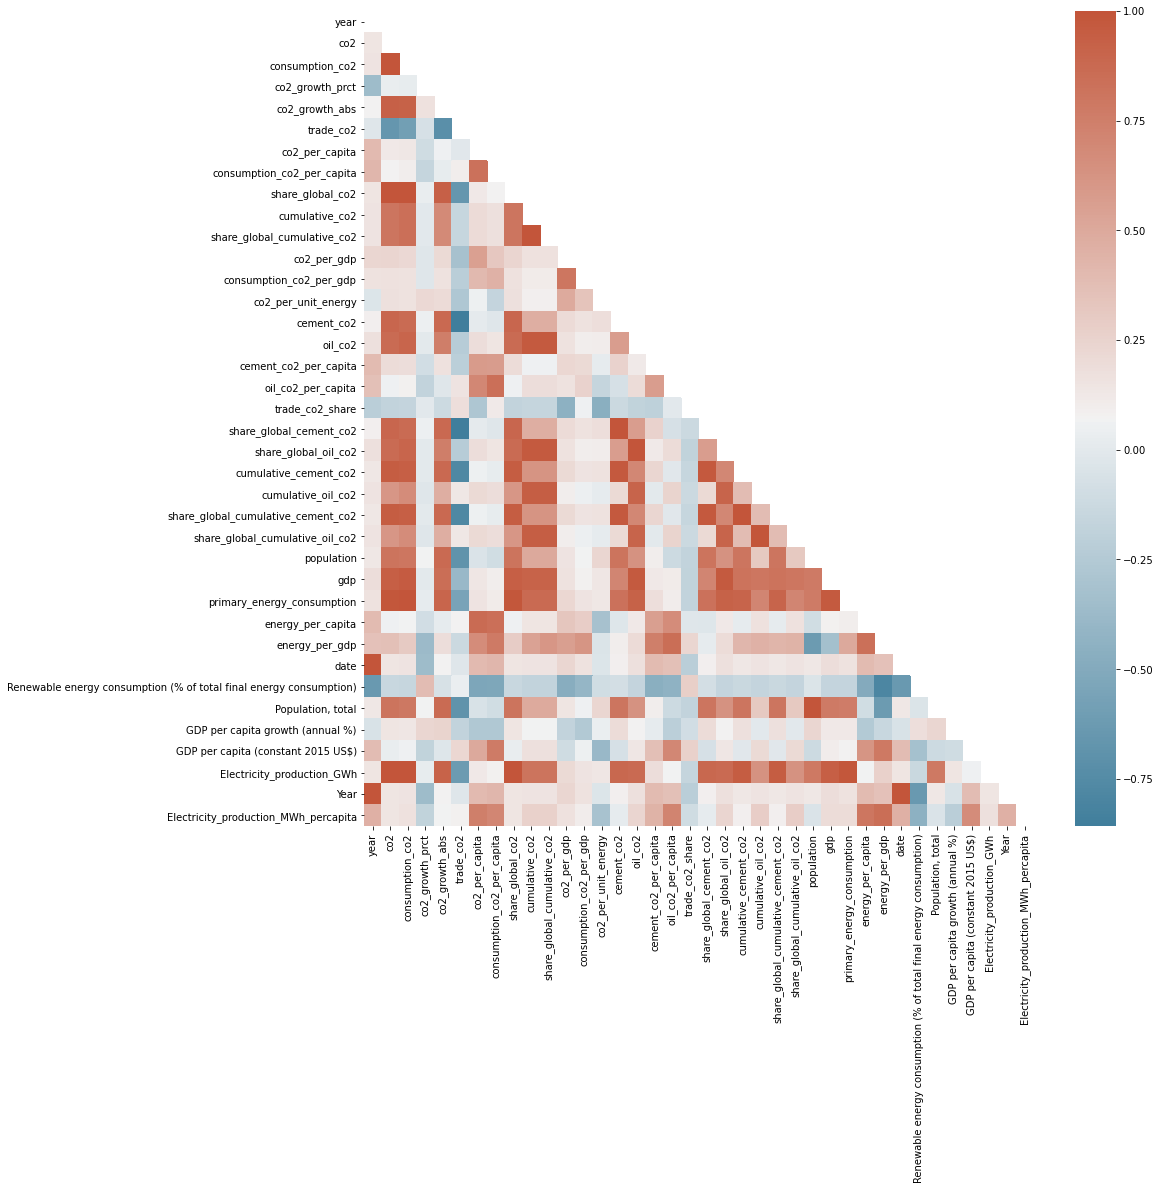

In [51]:
corr = data1.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(15, 15))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=False, mask = mask, cmap=cmap)

To check the coefficients uo to two digits, we have made an other matrix. However, this is too big becasue of the number of variables and coefficients

In [52]:
corr = data1.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

We have tried and other color type with seaborn, its is somewhat more pleasant to look at.

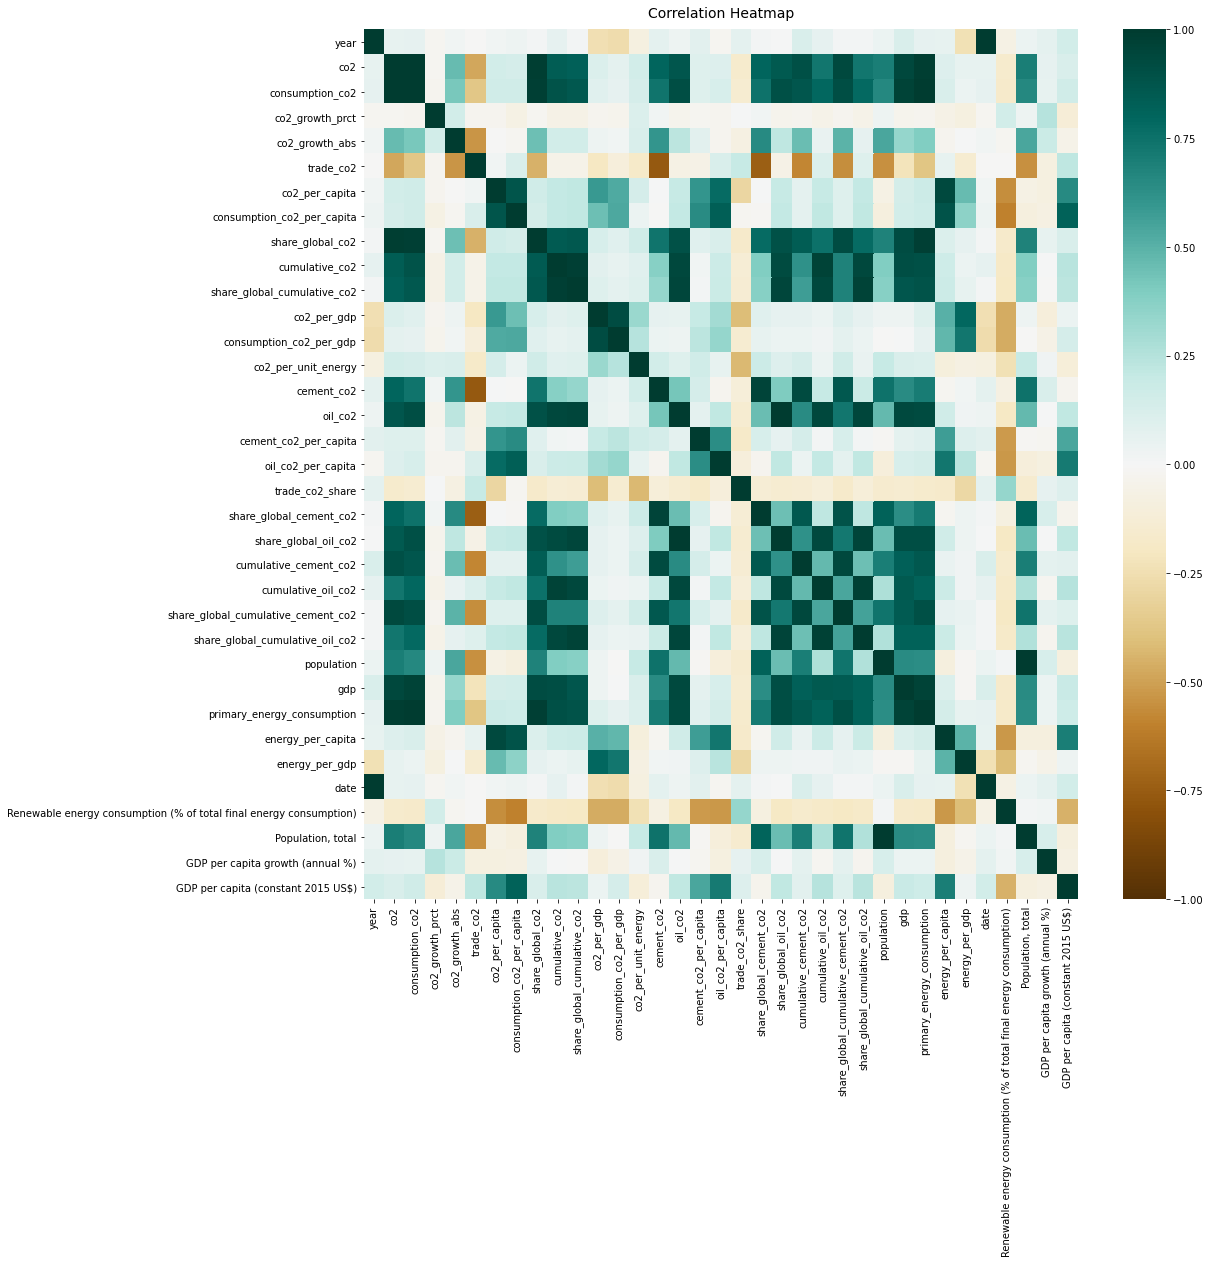

In [53]:
# Set the size of the heatmap.
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=False,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

To be able to see the big picture and the values as well, we created an interactive heatmap with plotly. By hovering on the matrix, we can check the actual variables in that row and the coefficient as well in a grey bubble.

In [56]:
import plotly.express as px
fig = px.imshow(data1.corr(),width=1500, height=1500)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightGrey",
)
fig.update_yaxes(automargin=True)
fig.show()

In some screen setup it is still to complicated to see, so in the following we created a html output based app with dash, which has adjustable size.

## Using a dash app to interactively set the size of the correlation matrix
1)Firstly, install dash from terminal using pip install dash

2)Then run the cell below

3)On the output URL you can open the dash app

In [112]:
#!pip install dash
#!pip install jupyter-dash
import dash

In [114]:
@title

import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)

app.layout = html.Div([
    html.H4('Live adjustable graph-size'),
    html.P("Change figure width:"),
    dcc.Slider(id='slider', min=500, max=2500, step=250, value=500,
               marks={x: str(x) for x in [500, 1000, 1500, 2000,2500]}),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"), 
    Input('slider', 'value'))
def resize_figure(width):
    df = px.data.tips() # replace with your own data source
    #fig = px.scatter(df, x="total_bill", y="tip", 
     #                facet_col="sex", height=400)
    fig = px.imshow(data.corr(),width=1000, height=1500)
    fig.update_layout(
        margin=dict(l=20, r=20, t=20, b=20),
        paper_bgcolor="LightGrey",)
    fig.update_layout(width=int(width))

    return fig


app.run_server(debug=False)

SyntaxError: invalid syntax (<ipython-input-114-2b90648e67ce>, line 3)

### Time trend of variables
We have already check the variables in several ways, but not the time trend. So we created plots below, which shows the variables of a given country through time. The examples are Hungary and China. 
Based on these plots , we get the intuition about what to use / include.

<AxesSubplot:xlabel='year'>

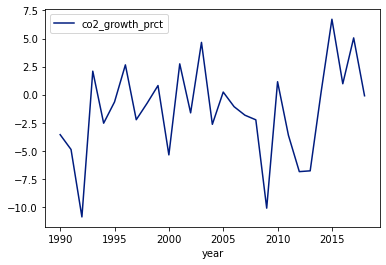

In [55]:
data[data['country']=='Hungary'][['year','co2_growth_prct']].set_index('year').plot()

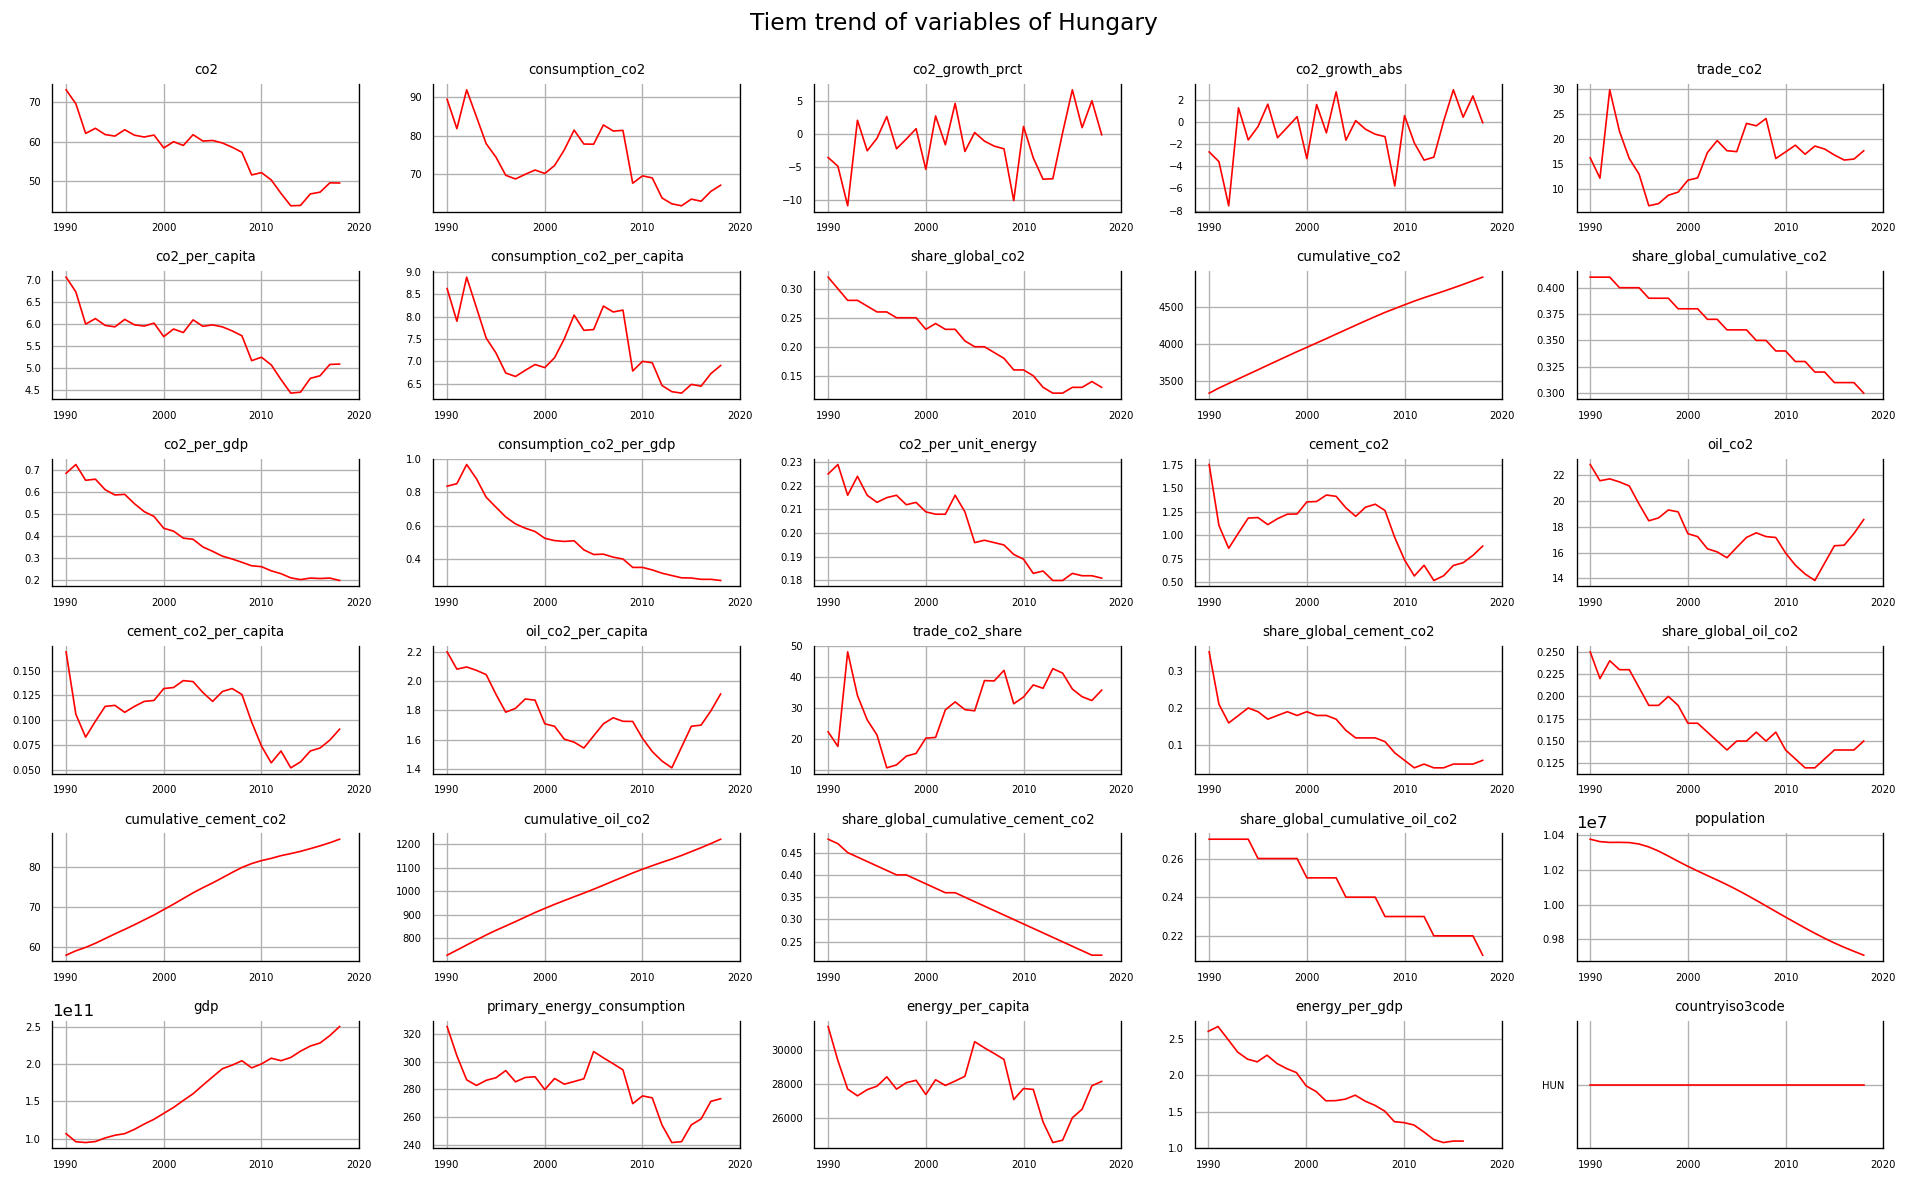

In [57]:
df = data[data['country']=='Hungary'].drop(columns=['iso_code','country'],axis=1).set_index('year')
fig, axes = plt.subplots(nrows=6, ncols=5, dpi=120, figsize=(16,10))
plt.suptitle('Tiem trend of variables of Hungary',fontsize=14)
for i, ax in enumerate(axes.flatten()):
    dt = df[df.columns[i]]
    ax.plot(dt, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i],fontsize=8)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.set_xticks(np.arange(1990,2030,10).tolist())
    ax.grid(True)

plt.tight_layout();
fig.subplots_adjust(top=0.92)

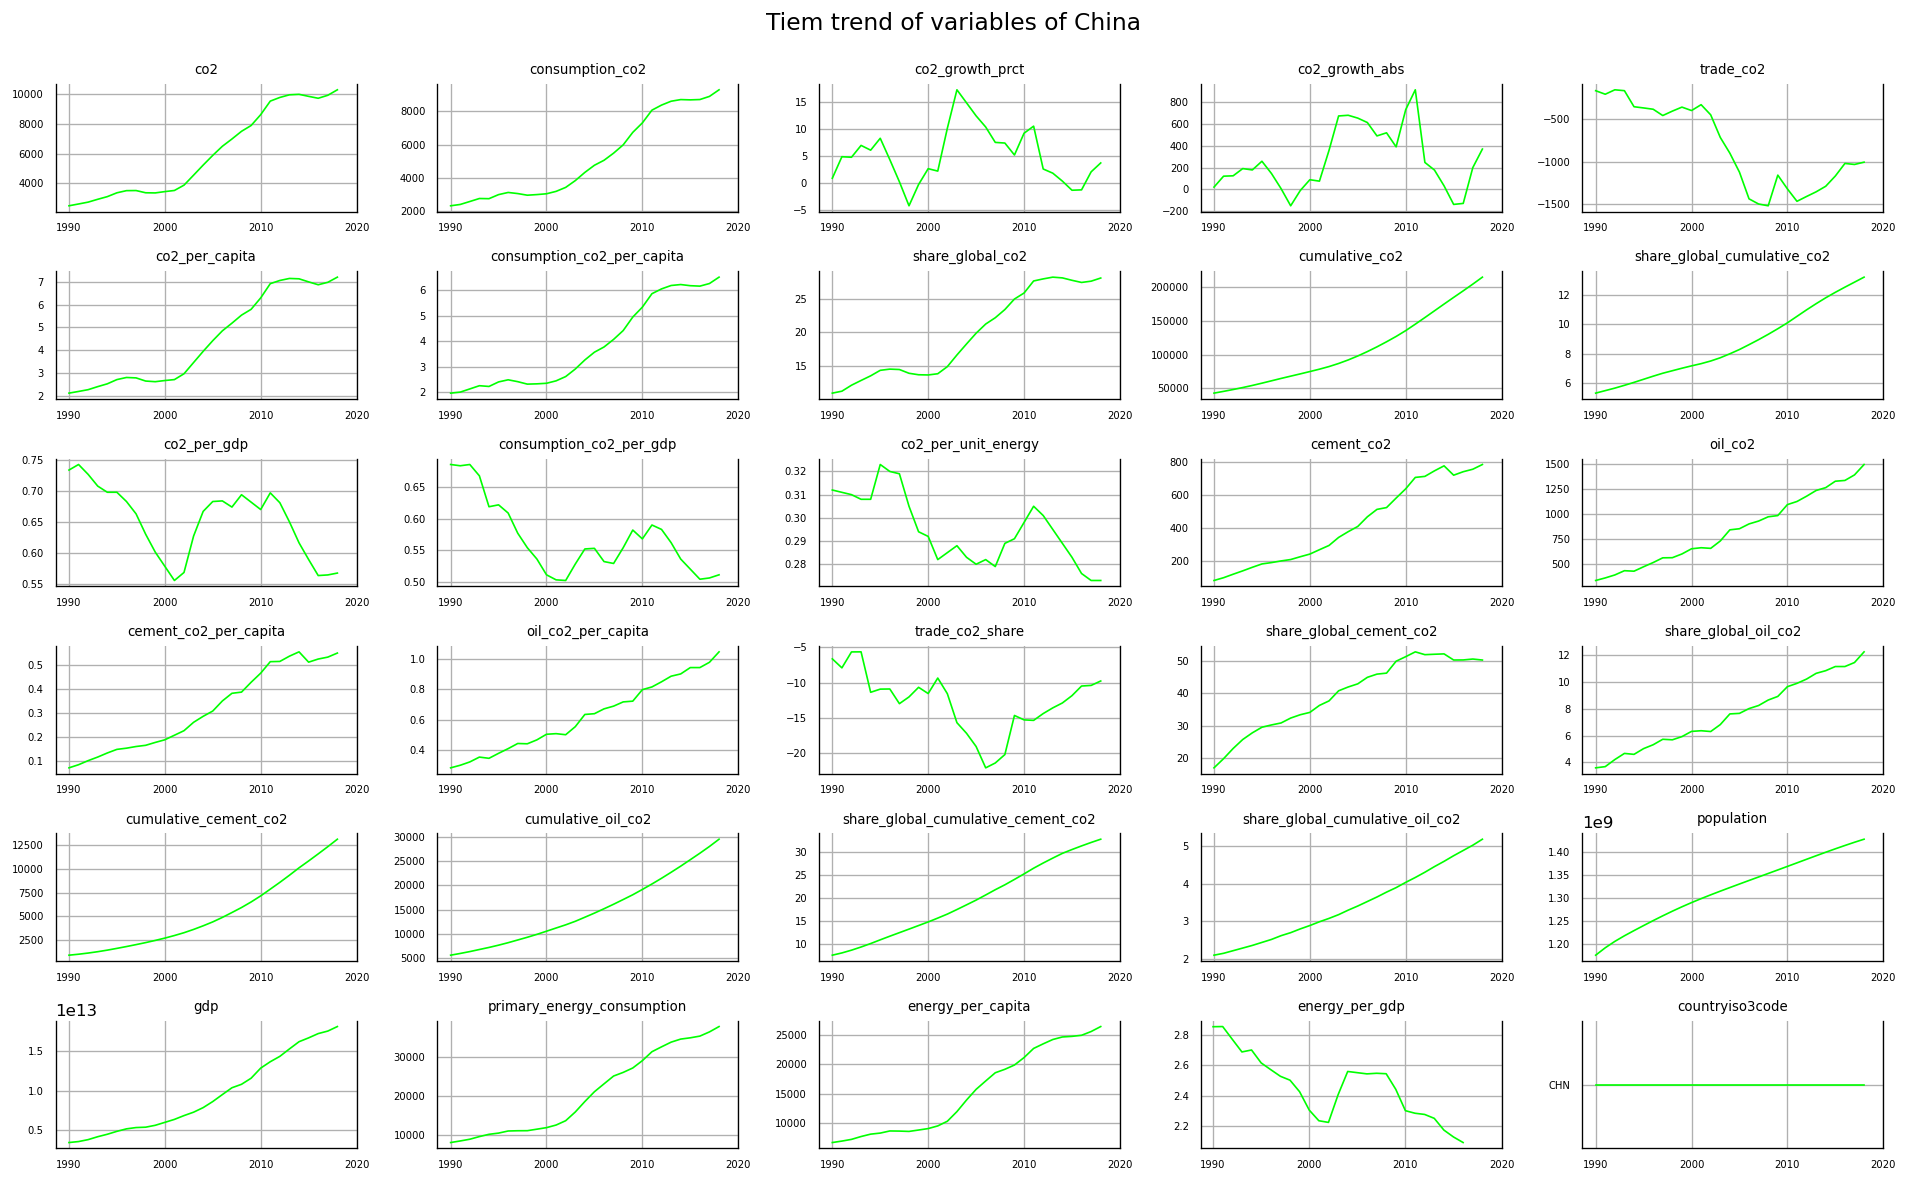

In [58]:
df = data[data['country']=='China'].drop(columns=['iso_code','country'],axis=1).set_index('year')
fig, axes = plt.subplots(nrows=6, ncols=5, dpi=120, figsize=(16,10))
plt.suptitle('Tiem trend of variables of China',fontsize=14)
for i, ax in enumerate(axes.flatten()):
    dt = df[df.columns[i]]
    ax.plot(dt, color='lime', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i],fontsize=8)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.set_xticks(np.arange(1990,2030,10).tolist())
    ax.grid(True)

plt.tight_layout();
fig.subplots_adjust(top=0.92)

# Time series modelling

In this part, we do multivariate Vector AutoRegressive models, which is often used in econometrics for time series prediction with multiple variables. The idea of the model is to use the previous (lagged) values of a variable and of other variables to predict the next one. In economic circumstances, this model often given great predictions.

Firstly, check our variables in the dataset

In [59]:
#check the dtypes
data.dtypes

iso_code                                                               object
country                                                                object
year                                                                    int64
co2                                                                   float64
consumption_co2                                                       float64
co2_growth_prct                                                       float64
co2_growth_abs                                                        float64
trade_co2                                                             float64
co2_per_capita                                                        float64
consumption_co2_per_capita                                            float64
share_global_co2                                                      float64
cumulative_co2                                                        float64
share_global_cumulative_co2                                     

Create a datetime object from the year.

In [60]:
data['Date_Time'] = pd.to_datetime(data.year , format = '%Y')
#data = data.drop(['date','countryiso3code'], axis=1)
#data.index = data.Date_Time


The pre dondition of a VAR model is that the series are stationary, so it has stable mean and variance over time. It can be tested with the ADF (Augmented Dickey-Fuller test). If a series it's not stationary, we can differenciate it, and check again until it's stationary.

Try the ADF test on 'co2' of Hungary

In [61]:
#checking stationarity

from statsmodels.tsa.stattools import adfuller
value = data[data['country']=='Hungary'].reset_index()['co2']#.to_list()
value

res = adfuller(value)

# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 


Augmneted Dickey_fuller Statistic: -2.067795
p-value: 0.257660


Since the p-value (0.25) is not less than .05, we fail to reject the null hypothesis. This means the time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.

We created a function which checks whether a series is stationer, and if not, differentiates it until it is.

In [62]:
# Create stationary variables in the dataframe for a country
def stationary_df(country='Hungary',data = data, variables=vars):
  df_stat = data[data['country']==country].reset_index()
  #df_stat = data[data['country']=='Hungary'].drop(columns=['iso_code','country'],axis=1).set_index('year').diff()
  #df_stat.dropna(axis=1)
  for column in vars:#[ 'co2', 'consumption_co2','co2_growth_abs', 'trade_co2',  'cumulative_co2','Renewable energy consumption (% of total final energy consumption)','GDP per capita growth (annual %)','oil_co2']:df_stat.columns[0:10]:
    if is_numeric_dtype(df_stat[column]) and column!='year' and column!='index': # when the variable is numeric and not the year
      print(column)
      d=int(1)
      res = adfuller(df_stat[column])
      if res[1]<0.1:
        df_stat['level_'+column] = df_stat[column]
      while res[1] > 0.1: #if the series is not stationer
        print("P-value: "+str(res[1]))
        if d==1:
          df_stat['diff_'+column] = df_stat[column].diff(d) # differenciate it with one period
        else:
          df_stat['diff_'+column] = df_stat['diff_'+column].diff(1)
          #df_stat.drop(column,inplace=True, axis=1) # drop the original, not stationer column

        df_stat = df_stat.dropna(axis=0)# drop the NA row because if the time series differentiation
        res = adfuller(df_stat['diff_'+column]) # do the Dickey-Fuller test
        d +=1
      print("P-value: "+str(res[1])+"\n"+column+" differentiated  "+str(d)+" times\n")

  return(df_stat)




In [63]:
vars =  ['co2','consumption_co2','co2_growth_abs', 'trade_co2',  'cumulative_co2','Renewable energy consumption (% of total final energy consumption)','GDP per capita growth (annual %)', 'oil_co2']
df_hun=stationary_df('Hungary',variables=vars)
print(df_hun.shape)

#creating the train and validation set
test_obs = 3
N = len(vars)+1
df_hun = df_hun.iloc[: , -N:].set_index('Date_Time')
print(df_hun.columns)
train = df_hun[:-test_obs]
test = df_hun[-test_obs:]

co2
P-value: 0.257659896953533
P-value: 0.39707641029134777
P-value: 0.4455022160430944
P-value: 0.9889814551386508
P-value: 0.00028375635781230406
co2 differentiated  5 times

consumption_co2
P-value: 0.11875185845448877
P-value: 0.00011997582091679213
consumption_co2 differentiated  2 times

co2_growth_abs
P-value: 0.6546628483303095
P-value: 0.9547708410801723
P-value: 0.67453867444329
P-value: 5.889085035316225e-15
co2_growth_abs differentiated  4 times

trade_co2
P-value: 0.07647108740689958
trade_co2 differentiated  1 times

cumulative_co2
P-value: 0.7756514940412714
P-value: 4.0953722792036644e-05
cumulative_co2 differentiated  2 times

Renewable energy consumption (% of total final energy consumption)
P-value: 0.8625350683853845
P-value: 0.017576800824425712
Renewable energy consumption (% of total final energy consumption) differentiated  2 times

GDP per capita growth (annual %)
P-value: 0.12366974976572731
P-value: 4.117971176317328e-06
GDP per capita growth (annual %) diffe

In [64]:
df_hun.columns

Index(['diff_co2', 'diff_consumption_co2', 'diff_co2_growth_abs',
       'level_trade_co2', 'diff_cumulative_co2',
       'diff_Renewable energy consumption (% of total final energy consumption)',
       'diff_GDP per capita growth (annual %)', 'diff_oil_co2'],
      dtype='object')

In [65]:
df_hun.shape

(13, 8)

Now we have the stationer series on all selected variables, so we can fit the model. Unfortunately, differenciating a time series results loss of observations in each step, so 13 observations left on the case of Hungary. We dividen it into train andd test ( last 3 obs) for the prediction.

In [66]:

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=test_obs)

C:\Users\Gyongyver\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\Gyongyver\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:716: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Gyongyver\Anaconda3\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning:

y is a deprecated alias for endog, will be removed in version 0.11.0



In [68]:
model=VAR(endog=train)
model_fit=model.fit(2)
model_fit.summary()

C:\Users\Gyongyver\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\Gyongyver\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1450: RuntimeWarning:

invalid value encountered in sqrt



  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 31, Mar, 2022
Time:                     23:36:35
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -497.137
Nobs:                     8.00000    HQIC:                  -507.596
Log likelihood:           2039.14    FPE:               1.96439e-228
AIC:                     -498.487    Det(Omega_mle):    2.15986e-232
--------------------------------------------------------------------
Results for equation diff_co2
                                                                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------------------------------
const                                                                              0.021807      

See the model summary above and the prediction below.

In [69]:
prediction = model_fit.forecast(model_fit.y, steps=len(test))

In [70]:
prediction = pd.DataFrame(prediction, columns=test.columns)
prediction

diff_co2  diff_consumption_co2  diff_co2_growth_abs  level_trade_co2  \
0  -4.729600            -15.072906            -4.730329         8.044333   
1  18.548493             14.570931            18.547644        17.062454   
2 -35.723195             -2.983889           -35.722741        18.178731   

   diff_cumulative_co2  \
0            39.195979   
1            44.234190   
2            40.468663   

   diff_Renewable energy consumption (% of total final energy consumption)  \
0                                           4.427942                         
1                                          -1.116847                         
2                                           0.660380                         

   diff_GDP per capita growth (annual %)  diff_oil_co2  
0                              -9.044604      0.432723  
1                              15.818804     -1.742648  
2                              -5.821645      1.177233

Compare the prediction to the test observations.

In [74]:
# Get the lag order
lag_order = model_fit.k_ar
print(lag_order)  #

# Input data for forecasting
forecast_input = df_hun.values[-lag_order:]
forecast_input

2


array([[-3.39800000e+00,  1.74100000e+00, -3.39400000e+00,
         1.68340000e+01,  4.66150000e+01, -1.22600555e-01,
        -5.54643705e-01, -6.00000000e-03],
       [-4.92200000e+00, -5.50000000e-01, -4.92300000e+00,
         1.58270000e+01,  4.70720000e+01, -3.36199760e-01,
        -1.45623179e+00, -1.29900000e+00]])

In [75]:
fc = model_fit.forecast(y=forecast_input, steps=test_obs)
df_forecast = pd.DataFrame(fc, index=df_hun.index[-test_obs:], columns=df_hun.columns + '_2d')
df_forecast

diff_co2_2d  diff_consumption_co2_2d  diff_co2_growth_abs_2d  \
Date_Time                                                                  
2014-01-01     2.560338                 4.640068                2.560065   
2015-01-01   -11.021696               -20.813917              -11.019955   
2016-01-01    31.199051                -1.095249               31.201152   

            level_trade_co2_2d  diff_cumulative_co2_2d  \
Date_Time                                                
2014-01-01           21.835699               46.024994   
2015-01-01           10.882476               36.609103   
2016-01-01            8.701203               37.427564   

            diff_Renewable energy consumption (% of total final energy consumption)_2d  \
Date_Time                                                                                
2014-01-01                                          -1.136638                            
2015-01-01                                           4.106249                            
2016-01-01                                           2.254231                            

            diff_GDP per capita growth (annual %)_2d  diff_oil_co2_2d  
Date_Time                                                              
2014-01-01                                  5.049330        -0.572908  
2015-01-01                                -14.336771         1.479336  
2016-01-01                                  7.657905        -1.283431

The forecasts are generated but it is on the scale of the training data used by the model. So, to bring it back up to its original scale, you need to de-difference it as many times you had differenced the original input data.

In [77]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [78]:
df_results = invert_transformation(train, df_forecast, second_diff=True) 
df_results

diff_co2_2d  diff_consumption_co2_2d  diff_co2_growth_abs_2d  \
Date_Time                                                                  
2014-01-01     2.560338                 4.640068                2.560065   
2015-01-01   -11.021696               -20.813917              -11.019955   
2016-01-01    31.199051                -1.095249               31.201152   

            level_trade_co2_2d  diff_cumulative_co2_2d  \
Date_Time                                                
2014-01-01           21.835699               46.024994   
2015-01-01           10.882476               36.609103   
2016-01-01            8.701203               37.427564   

            diff_Renewable energy consumption (% of total final energy consumption)_2d  \
Date_Time                                                                                
2014-01-01                                          -1.136638                            
2015-01-01                                           4.106249                            
2016-01-01                                           2.254231                            

            diff_GDP per capita growth (annual %)_2d  diff_oil_co2_2d  \
Date_Time                                                               
2014-01-01                                  5.049330        -0.572908   
2015-01-01                                -14.336771         1.479336   
2016-01-01                                  7.657905        -1.283431   

            diff_co2_1d  diff_co2_forecast  ...  level_trade_co2_1d  \
Date_Time                                   ...                       
2014-01-01    -6.312662          -5.413662  ...           23.471699   
2015-01-01   -17.334358         -22.748020  ...           34.354174   
2016-01-01    13.864693          -8.883327  ...           43.055377   

            level_trade_co2_forecast  diff_cumulative_co2_1d  \
Date_Time                                                      
2014-01-01                 42.102699               42.856994   
2015-01-01                 76.456873               79.466097   
2016-01-01                119.512250              116.893662   

            diff_cumulative_co2_forecast  \
Date_Time                                  
2014-01-01                     86.446994   
2015-01-01                    165.913092   
2016-01-01                    282.806753   

            diff_Renewable energy consumption (% of total final energy consumption)_1d  \
Date_Time                                                                                
2014-01-01                                          -2.141937                            
2015-01-01                                           1.964312                            
2016-01-01                                           4.218542                            

            diff_Renewable energy consumption (% of total final energy consumption)_forecast  \
Date_Time                                                                                      
2014-01-01                                          -1.425037                                  
2015-01-01                                           0.539274                                  
2016-01-01                                           4.757817                                  

            diff_GDP per capita growth (annual %)_1d  \
Date_Time                                              
2014-01-01                                 10.778596   
2015-01-01                                 -3.558175   
2016-01-01                                  4.099730   

            diff_GDP per capita growth (annual %)_forecast  diff_oil_co2_1d  \
Date_Time                                                                     
2014-01-01                                       13.612177        -0.647908   
2015-01-01                                       10.054002         0.831427   
2016-01-01                                       14.153731        -0.452004   

            diff

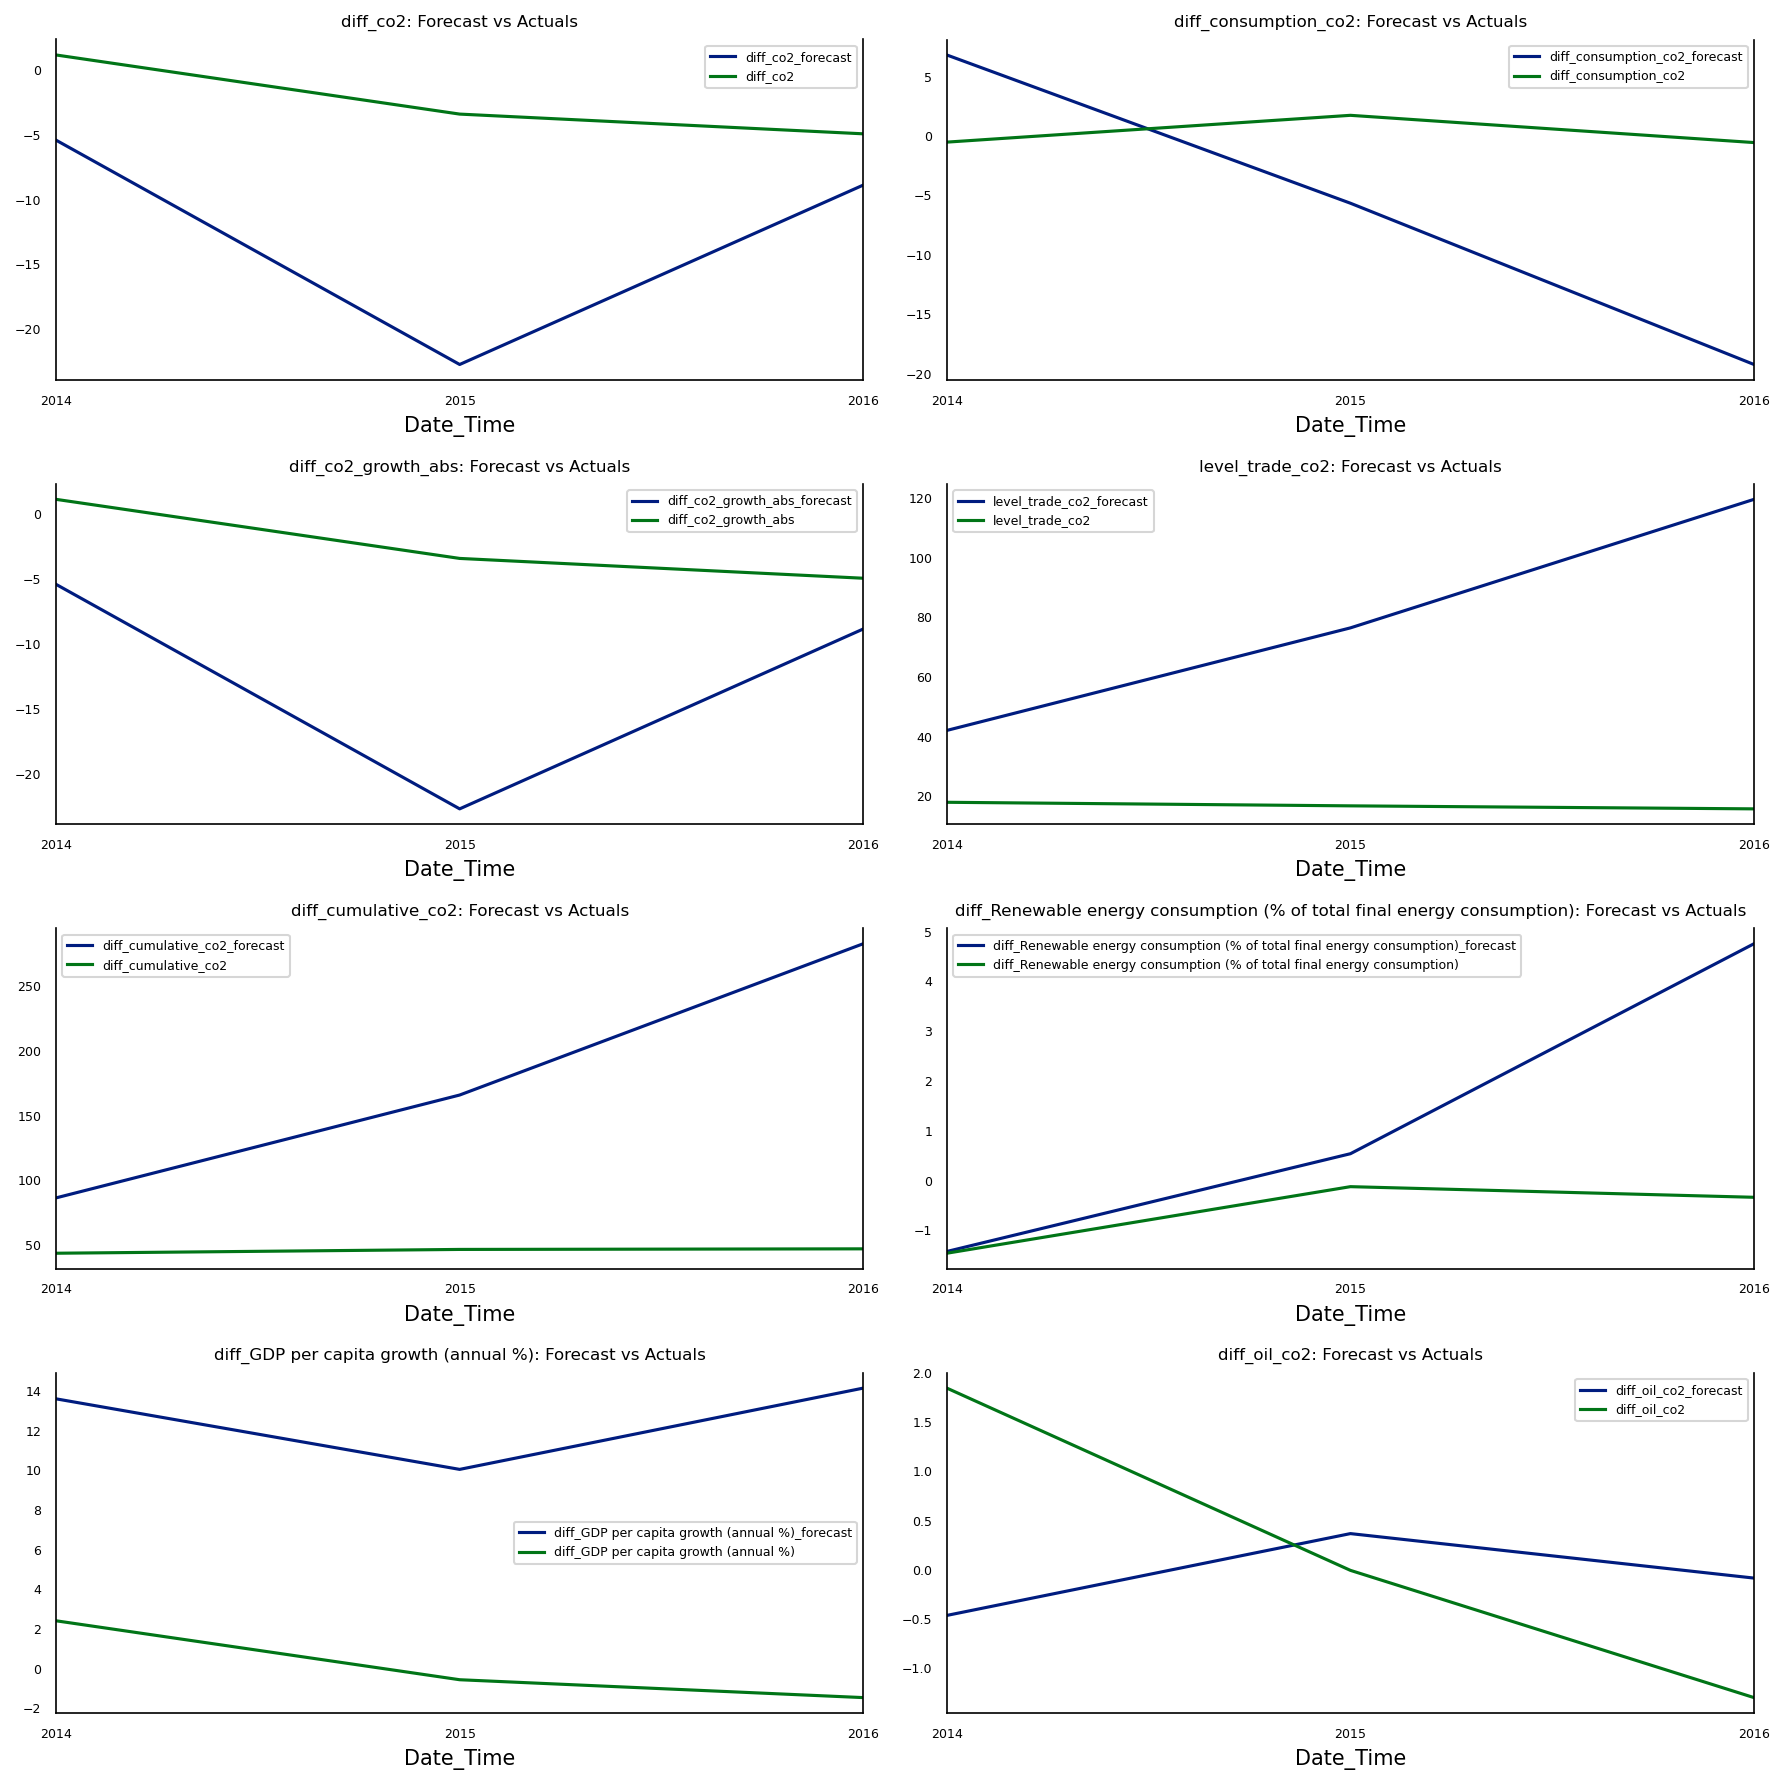

In [79]:
fig, axes = plt.subplots(nrows=int(len(df_hun.columns)/2), ncols=2, dpi=150, figsize=(12,12))
for i, (col,ax) in enumerate(zip(df_hun.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    test[col][-test_obs:].plot(legend=True, ax=ax).autoscale(axis='x',tight=True);
    ax.set_title(col + ": Forecast vs Actuals",fontsize=8)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.legend(loc='best',fontsize=6)

plt.tight_layout();

We can see the the prediction are not too good, for any variable. This is partly casue by the low number of observation in the time series (only 13 years)

### Re do the process on longer time interval

To get better understanding we try to re-do the same process on longer tiem interval(from 1970) in Hungary.

In [80]:
from dataclasses import dataclass
def time_series_analysis(country="Hungary",iso="hun",fromyear=1970,toyear=2019):
  data = pd.read_csv("https://raw.githubusercontent.com/gyongyver-droid/python3/master/Project/owid-co2-data.csv/owid-co2-data.csv")
  #Filter
  data = data[data['country']==country]
  data = data[data['year']>=fromyear]
  data = data[data['year']<toyear]
  # Get variables from API
  variables = ['EG.ELC.ACCS.ZS','EG.FEC.RNEW.ZS','EG.ELC.RNWX.ZS','SP.POP.TOTL','NY.GDP.PCAP.KD.ZG','NY.GDP.PCAP.KD']#,'SH.XPD.GHED.GD.ZS']
  df_worldbank = pd.DataFrame({'countryiso3code':[],'date':[]})
  for variable in variables:
    df_worldbank = df_worldbank.merge(get_worldbank_api(variable,str(fromyear),str(toyear),country=iso),how='outer', on=['countryiso3code','date'])
  df_worldbank['date'] = pd.to_numeric(df_worldbank['date'])
  # Merge
  data = data.merge(df_worldbank,left_on=['iso_code','year'], right_on=['countryiso3code','date'],how='left')
  # Drop variables with too much missing values
  data.dropna(axis=1,inplace=True,how='any')
  data['Date_Time'] = pd.to_datetime(data.year , format = '%Y')
  data = data.drop(['date','countryiso3code'], axis=1)
  return(data)




In [81]:
long_hun = time_series_analysis()
long_hun.columns

Index(['iso_code', 'country', 'year', 'co2', 'co2_growth_prct',
       'co2_growth_abs', 'co2_per_capita', 'share_global_co2',
       'cumulative_co2', 'share_global_cumulative_co2', 'co2_per_gdp',
       'co2_per_unit_energy', 'coal_co2', 'cement_co2', 'gas_co2', 'oil_co2',
       'cement_co2_per_capita', 'coal_co2_per_capita', 'gas_co2_per_capita',
       'oil_co2_per_capita', 'share_global_cement_co2',
       'share_global_coal_co2', 'share_global_gas_co2', 'share_global_oil_co2',
       'cumulative_cement_co2', 'cumulative_coal_co2', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'share_global_cumulative_cement_co2',
       'share_global_cumulative_coal_co2', 'share_global_cumulative_gas_co2',
       'share_global_cumulative_oil_co2', 'population', 'gdp',
       'primary_energy_consumption', 'energy_per_capita', 'Population, total',
       'Date_Time'],
      dtype='object')

In [86]:
vars =  [ 'co2', 'co2_growth_abs', 'coal_co2','Population, total', 'oil_co2', 'cumulative_co2', 'gdp']

df_hun=stationary_df('Hungary',data=long_hun ,variables=vars)
print(df_hun.shape)
print(df_hun.columns)
#creating the train and validation set
test_obs = 5
N = len(vars)+1
df_hun =df_hun.iloc[: , -N:].set_index('Date_Time') #df_hun.filter(regex="^"+"$|^".join(vars)+"$")  #
print(df_hun.shape)
train = df_hun[:-test_obs]
test = df_hun[-test_obs:]

co2
P-value: 0.9512834453943667
P-value: 3.7089022555616976e-06
co2 differentiated  2 times

co2_growth_abs
P-value: 3.7063445735114044e-06
co2_growth_abs differentiated  1 times

coal_co2
P-value: 0.7886505003797164
P-value: 0.029124055000408273
coal_co2 differentiated  2 times

Population, total
P-value: 0.9652612736230728
P-value: 0.021107960244962302
Population, total differentiated  2 times

oil_co2
P-value: 0.7547695425261284
P-value: 9.570357492865015e-05
oil_co2 differentiated  2 times

cumulative_co2
P-value: 0.0708839310845925
cumulative_co2 differentiated  1 times

gdp
P-value: 0.9960103066872238
P-value: 0.014138890072189698
gdp differentiated  2 times

(44, 46)
Index(['index', 'iso_code', 'country', 'year', 'co2', 'co2_growth_prct',
       'co2_growth_abs', 'co2_per_capita', 'share_global_co2',
       'cumulative_co2', 'share_global_cumulative_co2', 'co2_per_gdp',
       'co2_per_unit_energy', 'coal_co2', 'cement_co2', 'gas_co2', 'oil_co2',
       'cement_co2_per_capita', 

In [87]:
df_hun.columns

Index(['diff_co2', 'level_co2_growth_abs', 'diff_coal_co2',
       'diff_Population, total', 'diff_oil_co2', 'level_cumulative_co2',
       'diff_gdp'],
      dtype='object')

Use grid search for the lags

In [90]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

# Grid search
for i in [1,2,3,4,5,6,7,8]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()


Order = 1
AIC:  56.54254939841766
BIC:  58.95583426538286

Order = 2
AIC:  43.66972082482708
BIC:  48.24124463097961

Order = 3
AIC:  42.69975434720055
BIC:  49.473696472818354

Order = 4
AIC:  31.927703516074743
BIC:  40.94872227271334

Order = 5
AIC:  18.65420303134535
BIC:  29.96722809614749

Order = 6
AIC:  -60.49088771140229
BIC:  -46.84092480226863

Order = 7
AIC:  -120.500009952693
BIC:  -104.468523515821

Order = 8
AIC:  -124.69584391648982
BIC:  -106.23904086521327



C:\Users\Gyongyver\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\Gyongyver\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\Gyongyver\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\Gyongyver\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\Gyongyver\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\Gyongyver\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py

We stick with lag=4

In [91]:
model=VAR(endog=train)
model_fit=model.fit(4)
model_fit.summary()

C:\Users\Gyongyver\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 31, Mar, 2022
Time:                     23:43:26
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    40.9487
Nobs:                     35.0000    HQIC:                   35.0418
Log likelihood:          -703.375    FPE:                1.05782e+16
AIC:                      31.9277    Det(Omega_mle):     1.54749e+14
--------------------------------------------------------------------
Results for equation diff_co2
                               coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------
const                            66.386148        33.007929            2.011           0.044
L1.diff_co2                    -236.666651      2043.363078           -0.116           0.908
L1.level_

In [92]:
# Forecast
# Get the lag order
lag_order = model_fit.k_ar
print(lag_order)  #

# Input data for forecasting
forecast_input = df_hun.values[-lag_order:]
forecast_input

fc = model_fit.forecast(y=forecast_input, steps=test_obs)
df_forecast = pd.DataFrame(fc, index=df_hun.index[-test_obs:], columns=df_hun.columns + '_2d')
df_forecast

df_results = invert_transformation(train, df_forecast, second_diff=True) 
df_results

4


diff_co2_2d  level_co2_growth_abs_2d  diff_coal_co2_2d  \
Date_Time                                                            
2014-01-01    -5.188990                -5.188462          0.558185   
2015-01-01    -0.449297                -0.449032         -0.160381   
2016-01-01    -0.346785                -0.346462          0.746545   
2017-01-01    -1.035021                -1.036050          0.269418   
2018-01-01    -2.865769                -2.866496          0.420423   

            diff_Population, total_2d  diff_oil_co2_2d  \
Date_Time                                                
2014-01-01               16725.505440        -1.154936   
2015-01-01                6902.260925         1.731136   
2016-01-01              -11894.374542         1.091536   
2017-01-01              -50981.738571        -1.360797   
2018-01-01              -71775.420845        -3.691628   

            level_cumulative_co2_2d   diff_gdp_2d  diff_co2_1d  \
Date_Time                                                        
2014-01-01              4957.653169  1.078525e+10    -4.923990   
2015-01-01              5001.422183  1.291468e+10    -5.373288   
2016-01-01              5044.844582  1.208125e+10    -5.720072   
2017-01-01              5087.231798 -6.381390e+08    -6.755094   
2018-01-01              5126.753607  1.667647e+09    -9.620863   

            diff_co2_forecast  level_co2_growth_abs_1d  ...  diff_coal_co2_1d  \
Date_Time                                               ...                     
2014-01-01          -8.091990                -4.921462  ...         -0.232815   
2015-01-01         -13.465278                -5.370495  ...         -0.393196   
2016-01-01         -19.185350                -5.716957  ...          0.353349   
2017-01-01         -25.940444                -6.753007  ...          0.622767   
2018-01-01         -35.561306                -9.619502  ...          1.043190   

            diff_coal_co2_forecast  diff_Population, total_1d  \
Date_Time                                                       
2014-01-01               -1.522815               40810.505440   
2015-01-01               -1.916011               47712.766365   
2016-01-01               -1.562662               35818.391823   
2017-01-01               -0.939894              -15163.346748   
2018-01-01                0.103296              -86938.767593   

            diff_Population, total_forecast  diff_oil_co2_1d  \
Date_Time                                                      
2014-01-01                     13530.505440        -0.970936   
2015-01-01                     61243.271805         0.760200   
2016-01-01                     97061.663628         1.851736   
2017-01-01                     81898.316879         0.490939   
2018-01-01                     -5040.450714        -3.200689   

            diff_oil_co2_forecast  level_cumulative_co2_1d  \
Date_Time                                                    
2014-01-01              -1.470936              5001.243169   
2015-01-01              -0.710736             10002.665353   
2016-01-01               1.141000             15047.509935   
2017-01-01               1.631939             20134.741733   
2018-01-01              -1.568750             25261.495340   

            level_cumulative_co2_forecast   diff_gdp_1d  diff_gdp_forecast  
Date_Time                                                                   
2014-01-01                    9678.453169  1.845096e+10       2.278434e+10  
2015-01-01                   19681.118522  3.136563e+10       5.414997e+10  
2016-01-01                   34728.628457  4.344688e+10       9.759685e+10  
2017-01-01                   54863.370189  4.280874e+10       1.404056e+11  
2018-01-01                   80124.865529  4.447639e+10       1.848820e+11  

[5 rows x 21 columns]

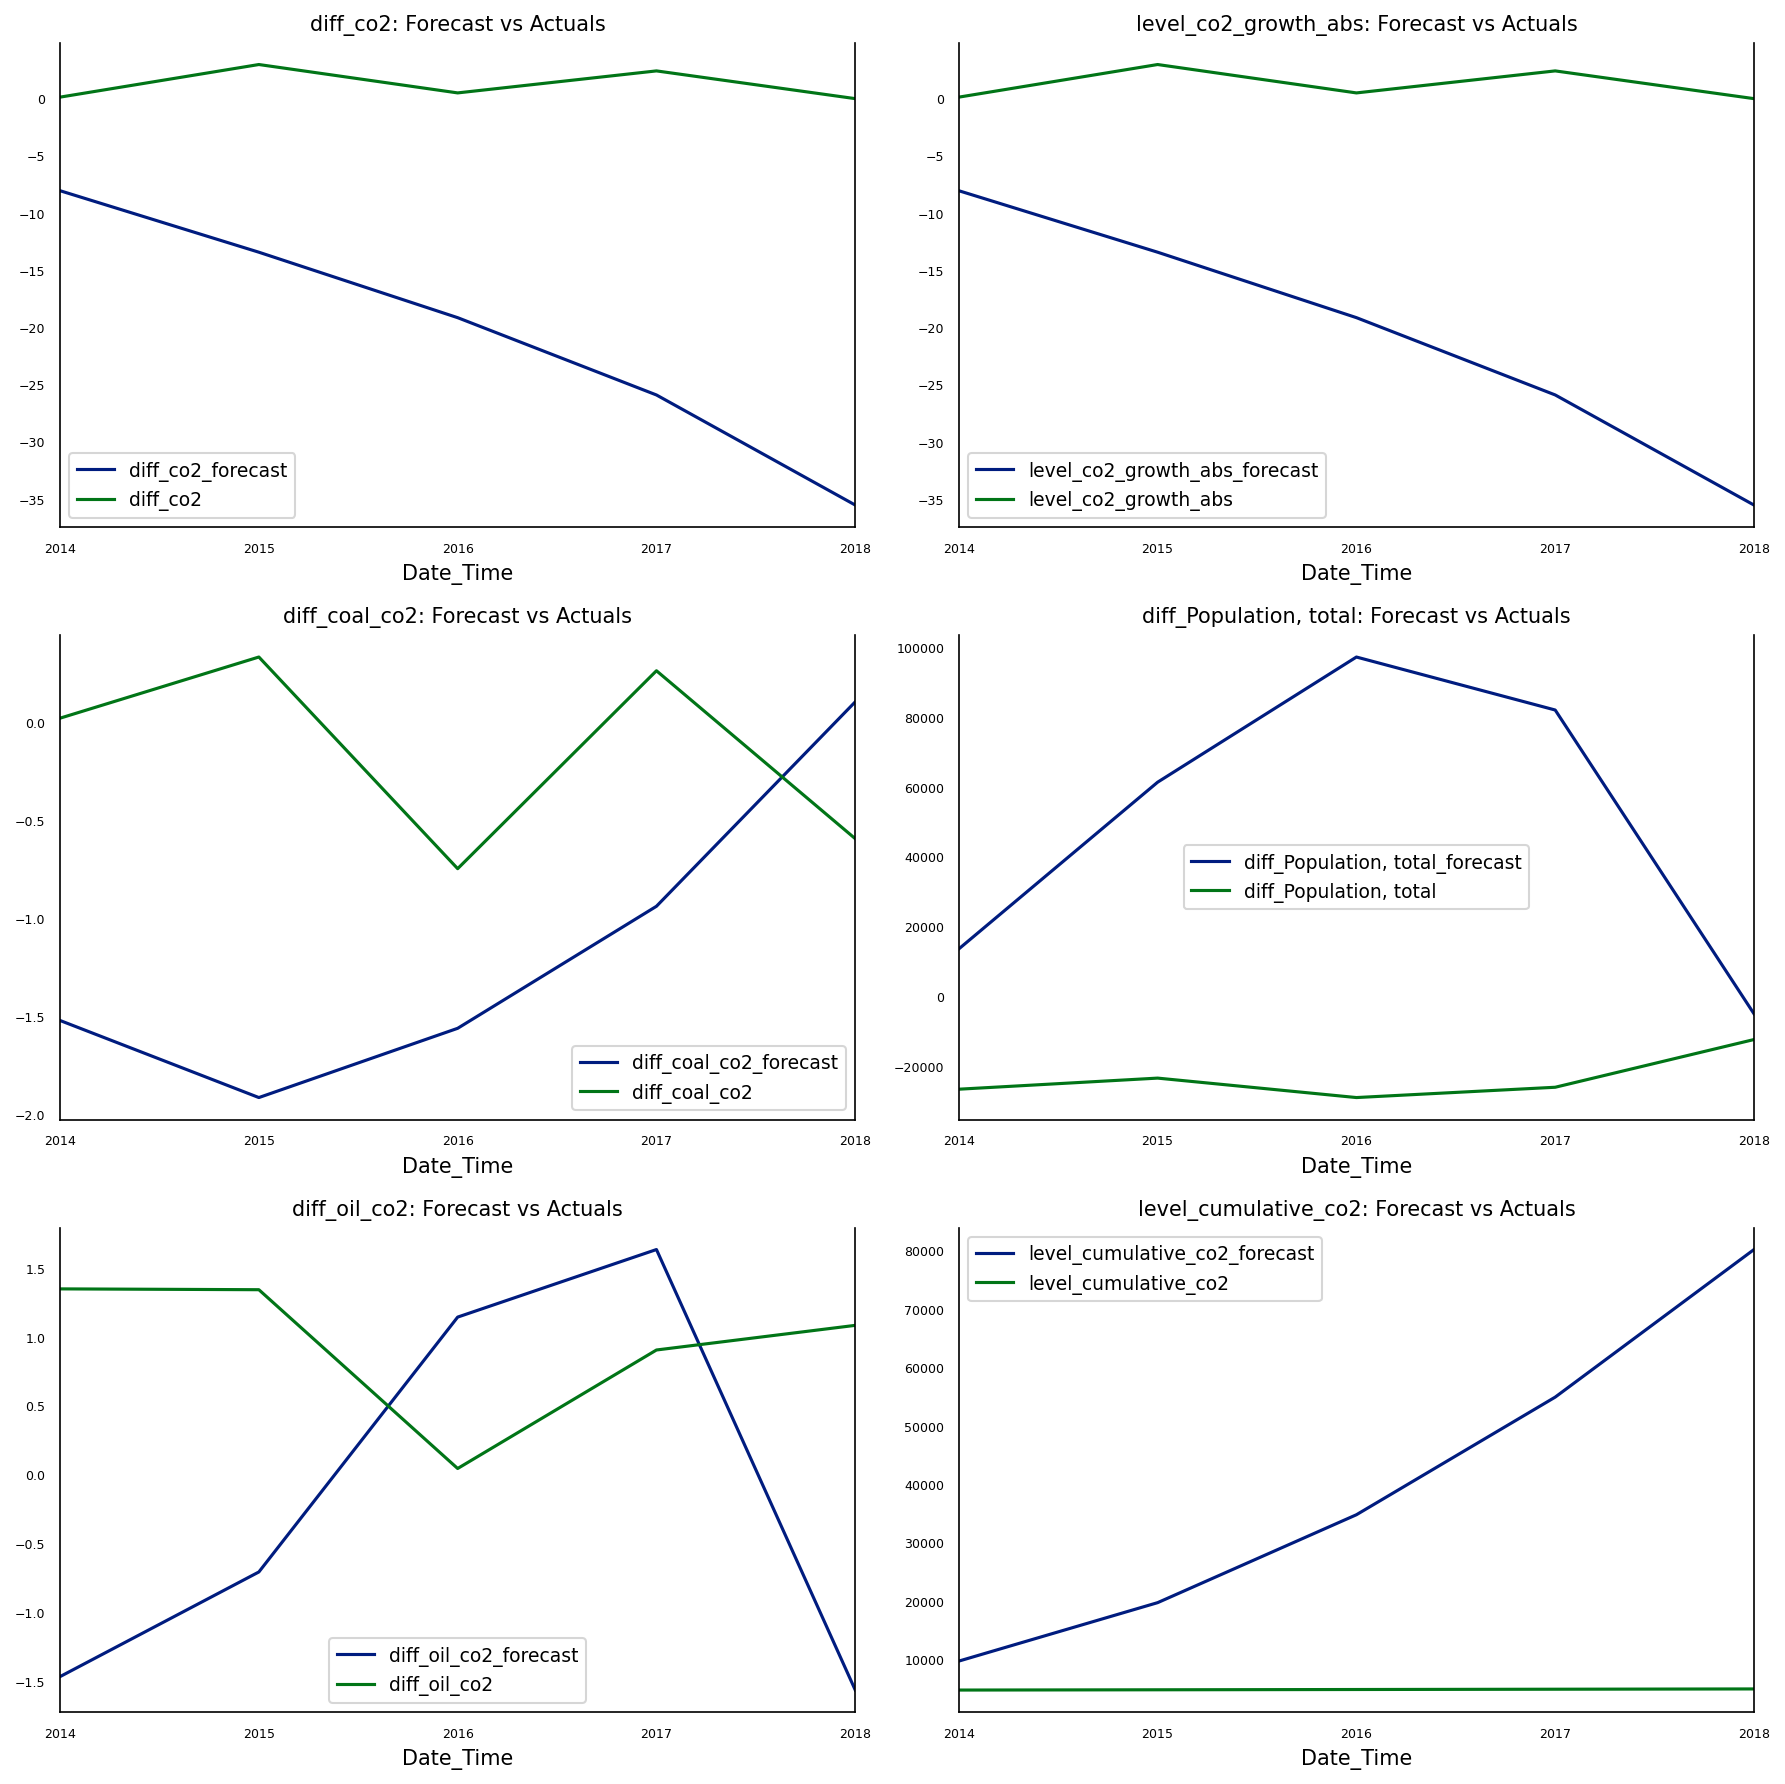

In [93]:
fig, axes = plt.subplots(nrows=int(len(df_hun.columns)/2), ncols=2, dpi=150, figsize=(12,12))
for i, (col,ax) in enumerate(zip(df_hun.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    test[col][-test_obs:].plot(legend=True, ax=ax).autoscale(axis='x',tight=True);
    ax.set_title(col + ": Forecast vs Actuals",fontsize=10)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.legend(loc='best',fontsize=9)

plt.tight_layout();

We can see the the predicted differenced are again far from the actual values. However, it's important to note, that these are the differenciated values, so the actual values do not have such huge gaps as we can see on the figures. 

We can see, that the selected environmental end economic variables are not useful in VAR model to predict each other, contrary to out belief. The result of this analysis is htat we need more data, liek mondly observations and probably different model too. Anyway, it way an interesting case to check VAR. Unfortumately, for more advanced model, model observations (not just yearly) is necessary.

## Analysis

We can also check the cross-sectional relationship between the interesting variables from Wikipedia.

Text(0.5, 1.0, 'Total Electricity production per Total CO2 consumption (bubblesize indicates population)')

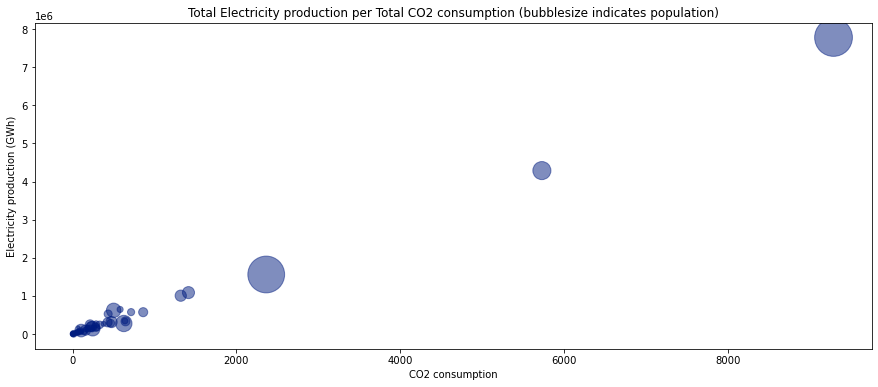

In [94]:
plt.figure(figsize=(15, 6))
plt.style.use('seaborn-dark-palette')
plt.scatter(data1['consumption_co2'], data1['Electricity_production_GWh'], s=data1['population']*0.000001, alpha=0.5)
plt.xlabel("CO2 consumption")
plt.ylabel("Electricity production (GWh)")
plt.title("Total Electricity production per Total CO2 consumption (bubblesize indicates population)",fontsize=12)

Text(0.5, 1.0, 'Correlation between Electricity production and CO2 consumption')

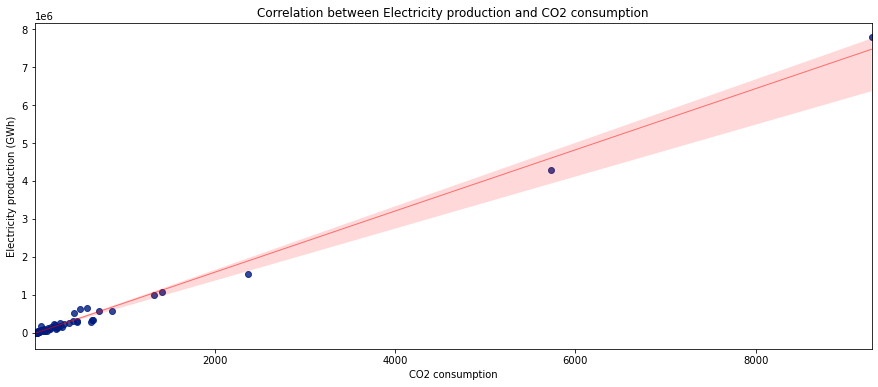

In [95]:
plt.figure(figsize=(15, 6))
sns.regplot(x=data1['consumption_co2'], y=data1['Electricity_production_GWh'], line_kws={"color":"r","alpha":0.5,"lw":1})
plt.xlabel("CO2 consumption")
plt.ylabel("Electricity production (GWh)")
plt.title("Correlation between Electricity production and CO2 consumption",fontsize=12)

KeyError: 0

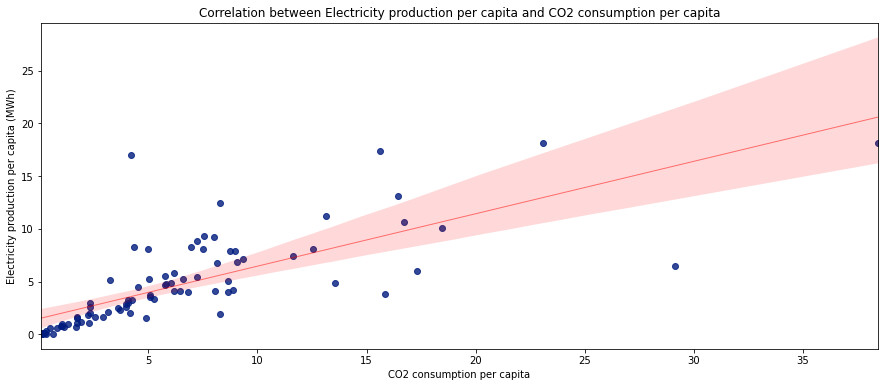

In [96]:
plt.figure(figsize=(15, 6))
sns.regplot(x=data1['co2_per_capita'], y=data1['Electricity_production_MWh_percapita'], line_kws={"color":"r","alpha":0.5,"lw":1})
plt.xlabel("CO2 consumption per capita")
plt.ylabel("Electricity production per capita (MWh)")
plt.title("Correlation between Electricity production per capita and CO2 consumption per capita",fontsize=12)
# marking certaion countries, runs in jupyter notebook for me
for i, country in enumerate (data1['iso_code']):
  if ((data1['co2_per_capita'][i] > 15) or (data1['Electricity_production_MWh_percapita'][i] > 15)):
    plt.text(data1['co2_per_capita'][i]+0.2, data1['Electricity_production_MWh_percapita'][i]+0.2, country)

We can conclude based on the plot above, that a country's CO2 consumption per capita correlates with its electricity production per capita. However, there are some outliers in both directions, for example Sweden, Canada or Finland. We can assume, that they use a fair share of alternatives to fossil energy sources.
On the other hand, countries such as Luxembourg and Trinidad and Tobago probably uses mostly fossil energy sources.

KeyError: 0

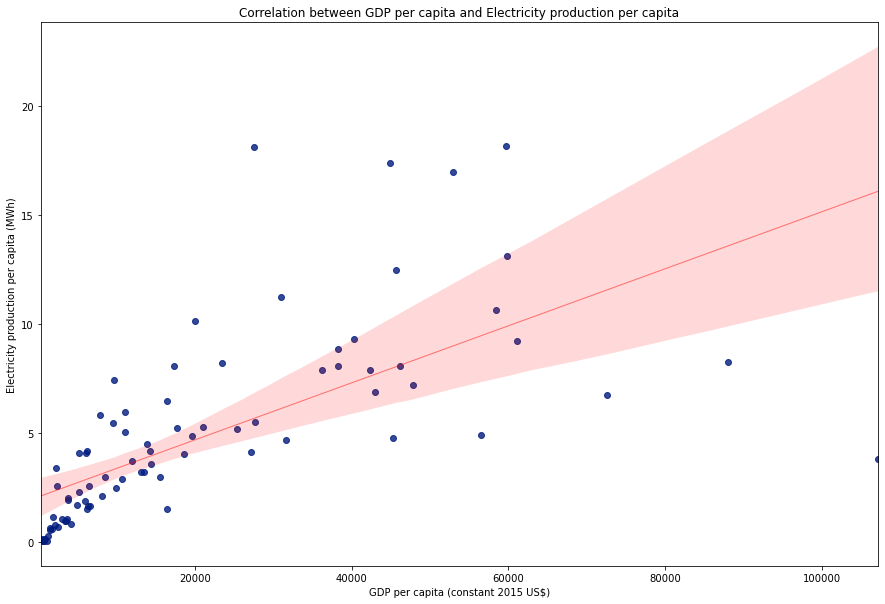

In [97]:
plt.figure(figsize=(15, 10))
sns.regplot(x=data1['GDP per capita (constant 2015 US$)'], y=data1['Electricity_production_MWh_percapita'], line_kws={"color":"r","alpha":0.5,"lw":1})
plt.xlabel("GDP per capita (constant 2015 US$)")
plt.ylabel("Electricity production per capita (MWh)")
plt.title("Correlation between GDP per capita and Electricity production per capita",fontsize=12)
for i, country in enumerate (data1['country']):
    if ((data1['GDP per capita (constant 2015 US$)'][i] > 30000) or (data1['Electricity_production_MWh_percapita'][i] > 10)):
        plt.text(data1['GDP per capita (constant 2015 US$)'][i]+0.2, data1['Electricity_production_MWh_percapita'][i]+0.2, country)

We can conclude based on the plot above, that a country's GDP per capita correlates with its electricity production per capita. However, there are some outliers in both directions, for example Bahrain and Kuwait produce a lot more than their GDP per capita would suggest. On the other hand,Luxembourg's GDP per capita is an outlier based on their electricity production.

Text(0.5, 1.0, 'GDP per capita and Electricity production per capita (size of bubble indicates population size)')

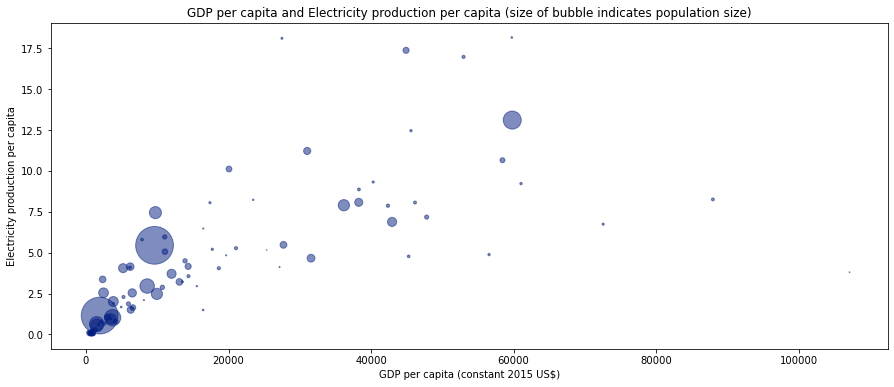

In [98]:
plt.figure(figsize=(15, 6))
plt.style.use('seaborn-dark-palette')
plt.scatter(data1['GDP per capita (constant 2015 US$)'], data1['Electricity_production_MWh_percapita'], s=data1['population']*0.000001, alpha=0.5)
plt.xlabel("GDP per capita (constant 2015 US$)")
plt.ylabel("Electricity production per capita")
plt.title("GDP per capita and Electricity production per capita (size of bubble indicates population size)",fontsize=12)

Based on the plot we can see, that electricity production per capita and GDP per capita are correlated, but the size of the population seems relatively random.